In [35]:
#importing modules

import numpy as np 
import pandas as pd 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 

%matplotlib inline 

In [4]:
#data read 
df=pd.read_csv('covid_19_data.csv')
df.head(10)

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   
5    6      01/22/2020      Guangdong  Mainland China  1/22/2020 17:00   
6    7      01/22/2020        Guangxi  Mainland China  1/22/2020 17:00   
7    8      01/22/2020        Guizhou  Mainland China  1/22/2020 17:00   
8    9      01/22/2020         Hainan  Mainland China  1/22/2020 17:00   
9   10      01/22/2020          Hebei  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  
5       26.0     0.0        0.0  
6        2.0     0.0        0.0  
7        1.0     0.0        0.0  
8        4.0     0.0        0.0  
9        1.0     0.0        0.0

In [5]:
df.drop(["SNo",'Last Update'],axis=1,inplace=True)
df.head()

ObservationDate Province/State  Country/Region  Confirmed  Deaths  Recovered
0      01/22/2020          Anhui  Mainland China        1.0     0.0        0.0
1      01/22/2020        Beijing  Mainland China       14.0     0.0        0.0
2      01/22/2020      Chongqing  Mainland China        6.0     0.0        0.0
3      01/22/2020         Fujian  Mainland China        1.0     0.0        0.0
4      01/22/2020          Gansu  Mainland China        0.0     0.0        0.0

In [8]:
df.rename(columns={"ObservationDate":"Date","Province/State":"State","Country/Region":"Country"},inplace=True)

In [14]:
df.head()

Date         State         Country  Confirmed  Deaths  Recovered
0    01/22/2020         Anhui  Mainland China        1.0     0.0        0.0
1    01/22/2020       Beijing  Mainland China       14.0     0.0        0.0
2    01/22/2020     Chongqing  Mainland China        6.0     0.0        0.0
3    01/22/2020        Fujian  Mainland China        1.0     0.0        0.0
4    01/22/2020         Gansu  Mainland China        0.0     0.0        0.0
..          ...           ...             ...        ...     ...        ...
195  01/26/2020        Yunnan  Mainland China       16.0     0.0        0.0
196  01/26/2020  Heilongjiang  Mainland China       15.0     1.0        0.0
197  01/26/2020       Tianjin  Mainland China       14.0     0.0        0.0
198  01/26/2020         Hebei  Mainland China       13.0     1.0        0.0
199  01/26/2020        Shanxi  Mainland China        9.0     0.0        0.0

[200 rows x 6 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       306429 non-null  object 
 1   State      228326 non-null  object 
 2   Country    306429 non-null  object 
 3   Confirmed  306429 non-null  float64
 4   Deaths     306429 non-null  float64
 5   Recovered  306429 non-null  float64
dtypes: float64(3), object(3)
memory usage: 14.0+ MB


In [16]:
#df.describe()

In [17]:
df["Date"]=pd.to_datetime(df['Date'])

In [18]:
df.head()

Date      State         Country  Confirmed  Deaths  Recovered
0 2020-01-22      Anhui  Mainland China        1.0     0.0        0.0
1 2020-01-22    Beijing  Mainland China       14.0     0.0        0.0
2 2020-01-22  Chongqing  Mainland China        6.0     0.0        0.0
3 2020-01-22     Fujian  Mainland China        1.0     0.0        0.0
4 2020-01-22      Gansu  Mainland China        0.0     0.0        0.0

In [19]:
imputer=SimpleImputer(strategy='constant')

In [21]:
df2=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df2.head()

Date      State         Country Confirmed Deaths Recovered
0 2020-01-22      Anhui  Mainland China       1.0    0.0       0.0
1 2020-01-22    Beijing  Mainland China      14.0    0.0       0.0
2 2020-01-22  Chongqing  Mainland China       6.0    0.0       0.0
3 2020-01-22     Fujian  Mainland China       1.0    0.0       0.0
4 2020-01-22      Gansu  Mainland China       0.0    0.0       0.0

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       306429 non-null  datetime64[ns]
 1   State      306429 non-null  object        
 2   Country    306429 non-null  object        
 3   Confirmed  306429 non-null  object        
 4   Deaths     306429 non-null  object        
 5   Recovered  306429 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 14.0+ MB


In [27]:
df3=df2.groupby(['Country'])[['Confirmed',"Deaths",'Recovered']].sum().reset_index()
df3

Country   Confirmed    Deaths   Recovered
0                        Azerbaijan         1.0       0.0         0.0
1                   ('St. Martin',)         2.0       0.0         0.0
2                       Afghanistan  17026442.0  669075.0  13464399.0
3                           Albania  19768869.0  375955.0  13945256.0
4                           Algeria  27684358.0  834464.0  18959299.0
..                              ...         ...       ...         ...
224              West Bank and Gaza  41819444.0  440378.0  37003116.0
225                           Yemen    962066.0  237613.0    506523.0
226                          Zambia  13493953.0  205990.0  12625626.0
227                        Zimbabwe   6484581.0  237234.0   5594887.0
228  occupied Palestinian territory        25.0       0.0         0.0

[229 rows x 4 columns]

In [28]:
df4=df2.groupby(['Country','Date'])[['Confirmed',"Deaths",'Recovered']].sum().reset_index()
df4

Country       Date Confirmed Deaths Recovered
0                          Azerbaijan 2020-02-28       1.0    0.0       0.0
1                     ('St. Martin',) 2020-03-10       2.0    0.0       0.0
2                         Afghanistan 2020-02-24       1.0    0.0       0.0
3                         Afghanistan 2020-02-25       1.0    0.0       0.0
4                         Afghanistan 2020-02-26       1.0    0.0       0.0
...                               ...        ...       ...    ...       ...
87276  occupied Palestinian territory 2020-03-12       0.0    0.0       0.0
87277  occupied Palestinian territory 2020-03-14       0.0    0.0       0.0
87278  occupied Palestinian territory 2020-03-15       0.0    0.0       0.0
87279  occupied Palestinian territory 2020-03-16       0.0    0.0       0.0
87280  occupied Palestinian territory 2020-03-17       0.0    0.0       0.0

[87281 rows x 5 columns]

In [29]:
df4=df2.groupby(['Date','Country'])[['Confirmed',"Deaths",'Recovered']].sum().reset_index()
df4

Date             Country Confirmed  Deaths Recovered
0     2020-01-22               China       0.0     0.0       0.0
1     2020-01-22           Hong Kong       0.0     0.0       0.0
2     2020-01-22               Japan       2.0     0.0       0.0
3     2020-01-22            Kiribati       0.0     0.0       0.0
4     2020-01-22               Macau       1.0     0.0       0.0
...          ...                 ...       ...     ...       ...
87276 2021-05-29             Vietnam    6908.0    47.0    2896.0
87277 2021-05-29  West Bank and Gaza  307838.0  3492.0  300524.0
87278 2021-05-29               Yemen    6731.0  1319.0    3399.0
87279 2021-05-29              Zambia   94751.0  1276.0   91594.0
87280 2021-05-29            Zimbabwe   38933.0  1594.0   36578.0

[87281 rows x 5 columns]

In [30]:
#checking countries have more than 100000 
df3=df2.groupby(['Country'])[['Confirmed',"Deaths",'Recovered']].sum().reset_index()
df3.head(2)

Country Confirmed Deaths Recovered
0       Azerbaijan       1.0    0.0       0.0
1  ('St. Martin',)       2.0    0.0       0.0

In [32]:
df5=df3[df3['Confirmed']>100000]
df5

Country   Confirmed    Deaths   Recovered
2           Afghanistan  17026442.0  669075.0  13464399.0
3               Albania  19768869.0  375955.0  13945256.0
4               Algeria  27684358.0  834464.0  18959299.0
5               Andorra   2379802.0   32100.0   2162473.0
6                Angola   4764863.0  116489.0   3683041.0
..                  ...         ...       ...         ...
223             Vietnam    615984.0   10220.0    486370.0
224  West Bank and Gaza  41819444.0  440378.0  37003116.0
225               Yemen    962066.0  237613.0    506523.0
226              Zambia  13493953.0  205990.0  12625626.0
227            Zimbabwe   6484581.0  237234.0   5594887.0

[180 rows x 4 columns]

In [34]:
print("the numbers of counties which has more than 1 lacks = ",len(df5))

the numbers of counties which has more than 1 lacks =  180


In [38]:
df4=df2.groupby(['Country','Date'])[['Confirmed',"Deaths",'Recovered']].sum().reset_index()
df4
#find unique countries 
countries=df['Country'].unique()
#countries
end=len(countries)
end

229

In [43]:
df4.head(2)

Date    Country Confirmed Deaths Recovered
0 2020-01-22      China       0.0    0.0       0.0
1 2020-01-22  Hong Kong       0.0    0.0       0.0

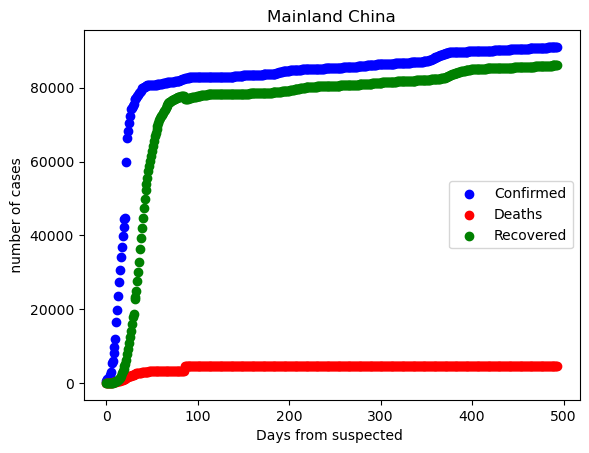

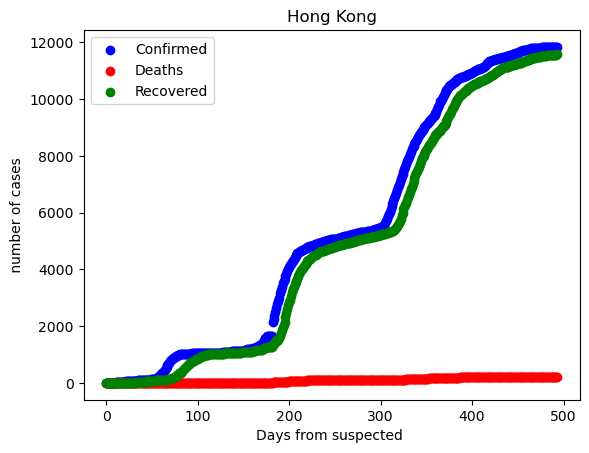

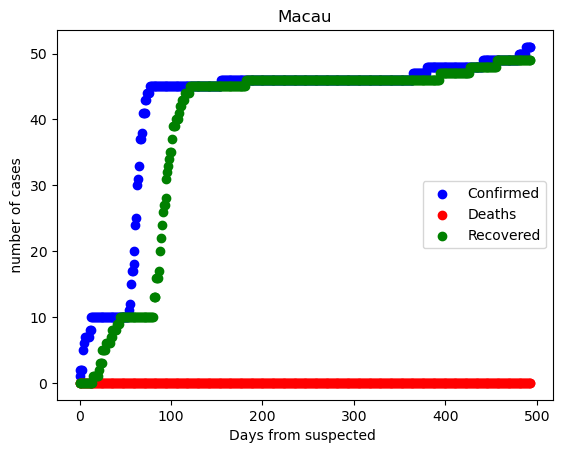

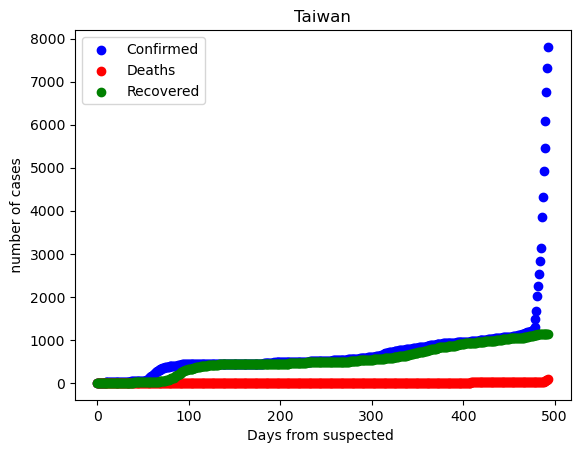

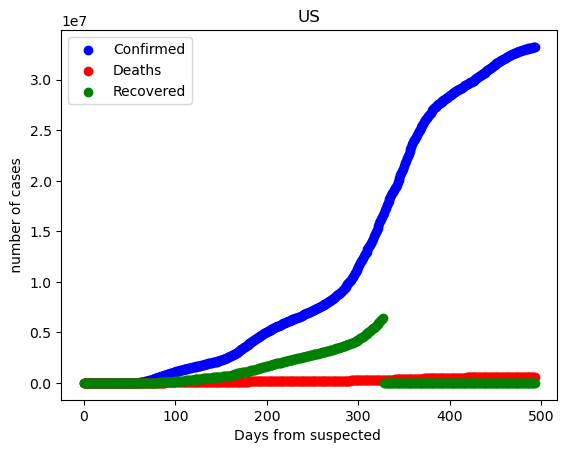

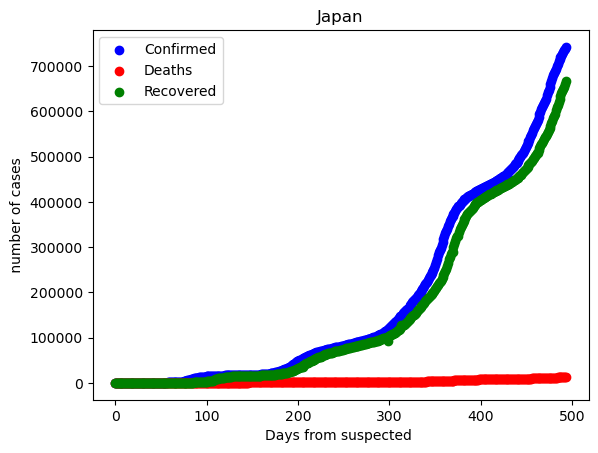

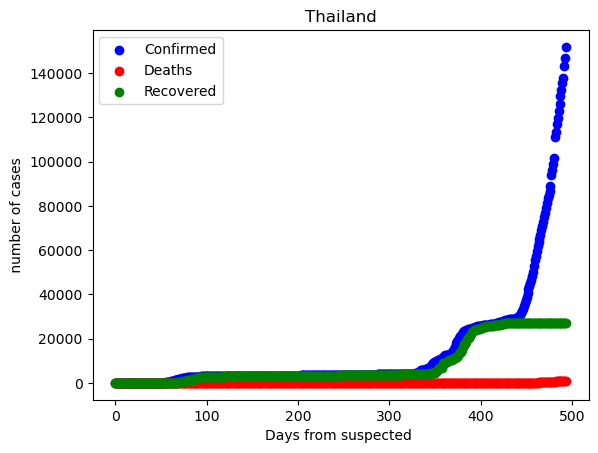

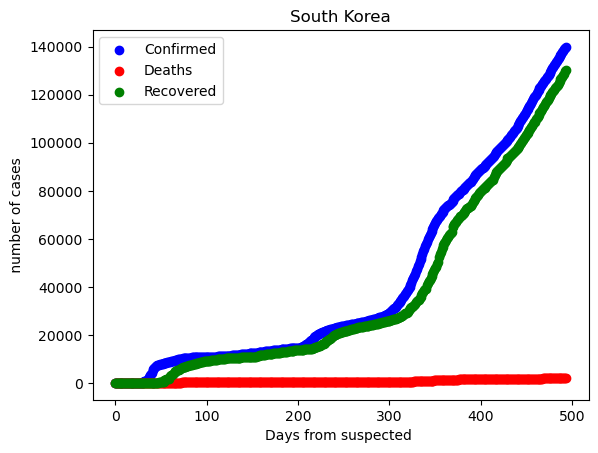

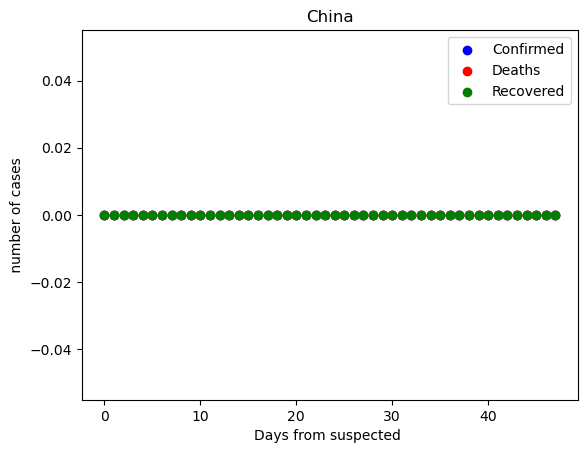

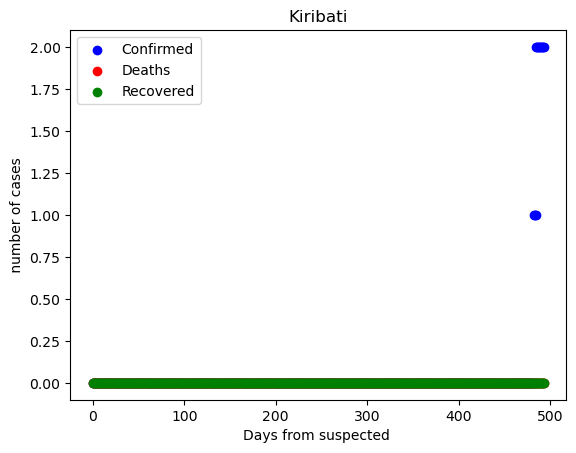

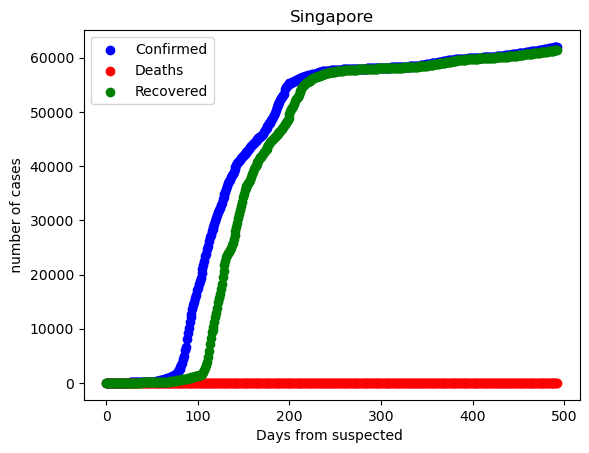

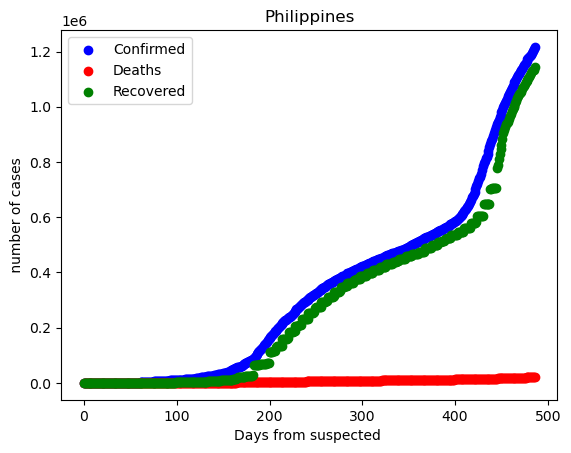

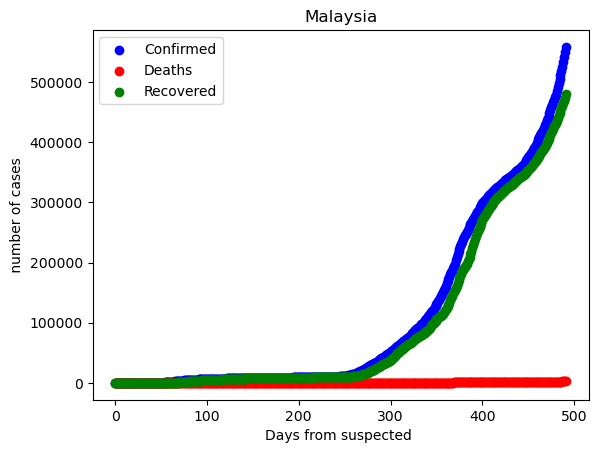

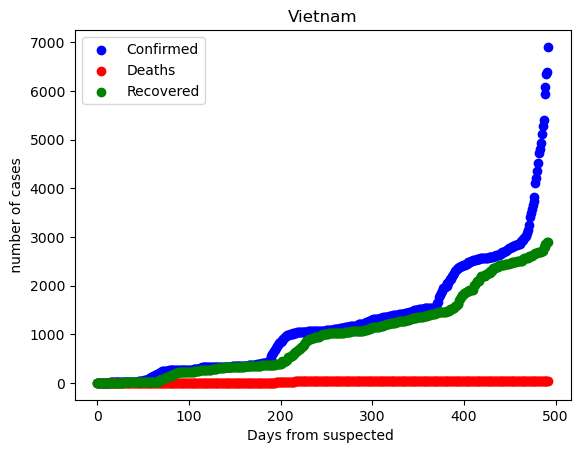

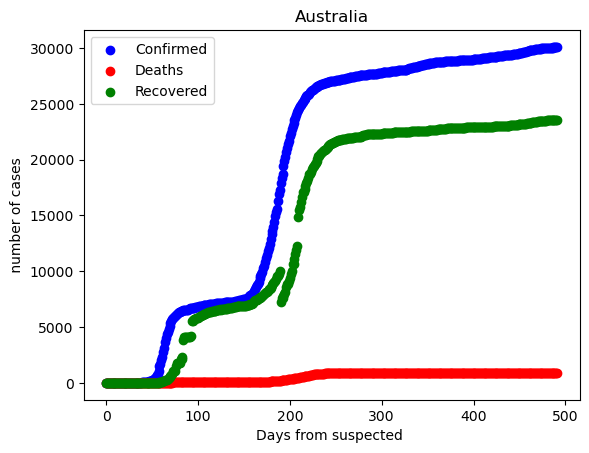

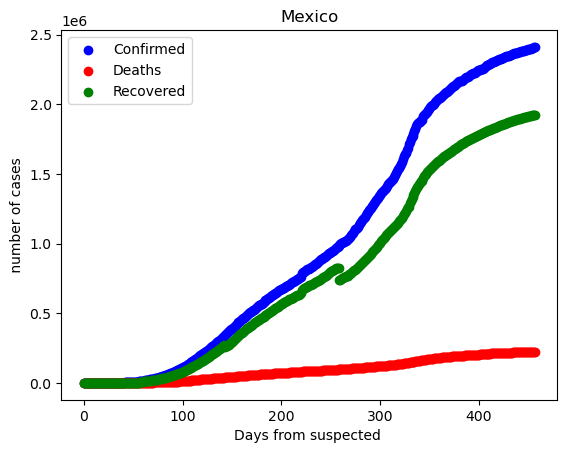

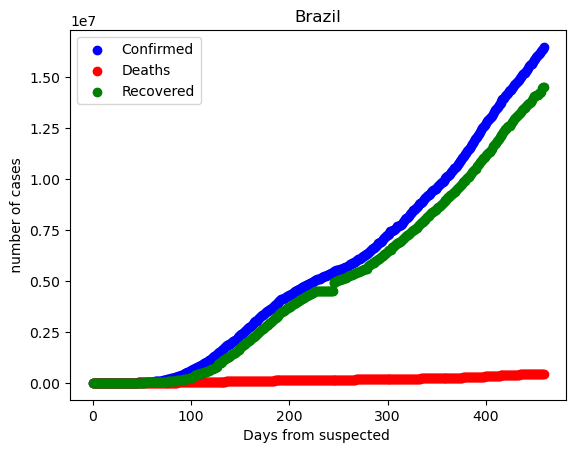

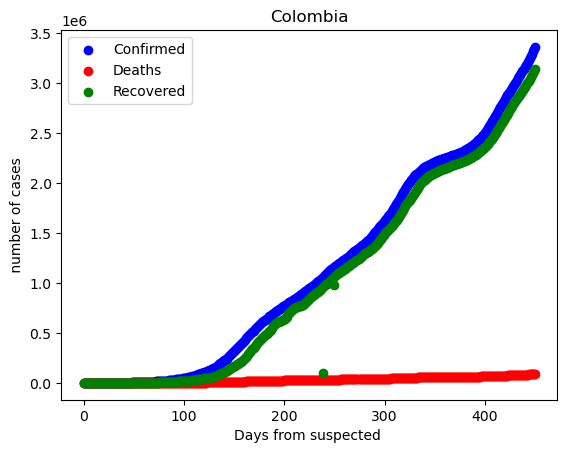

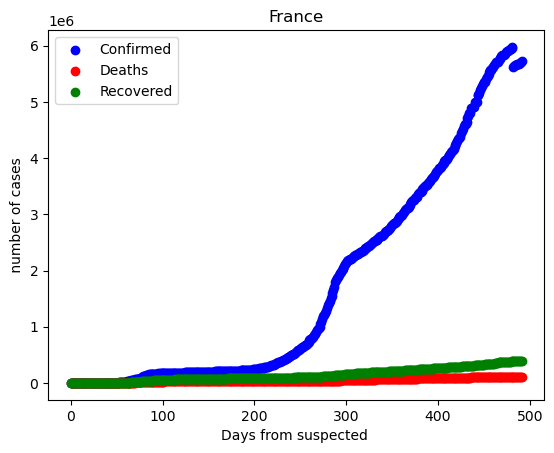

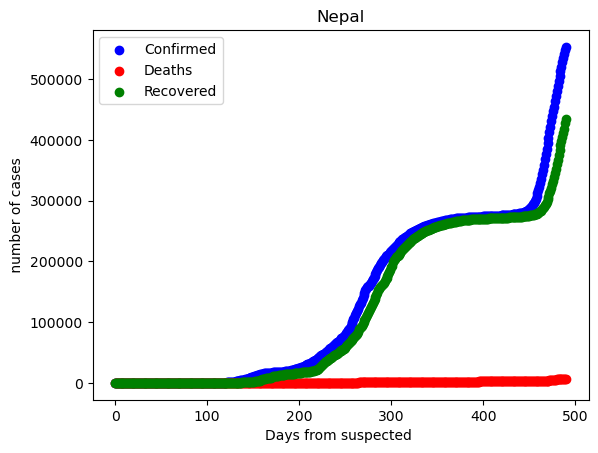

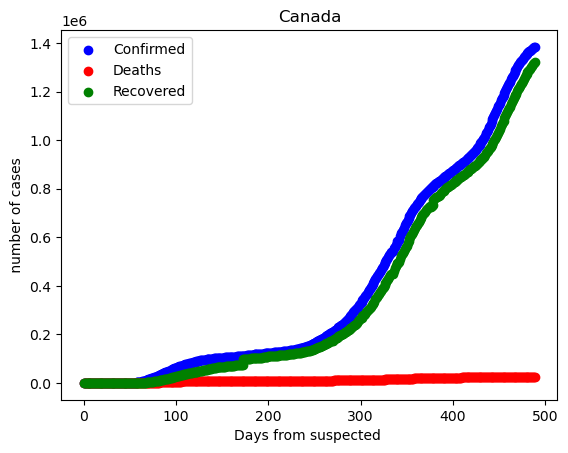

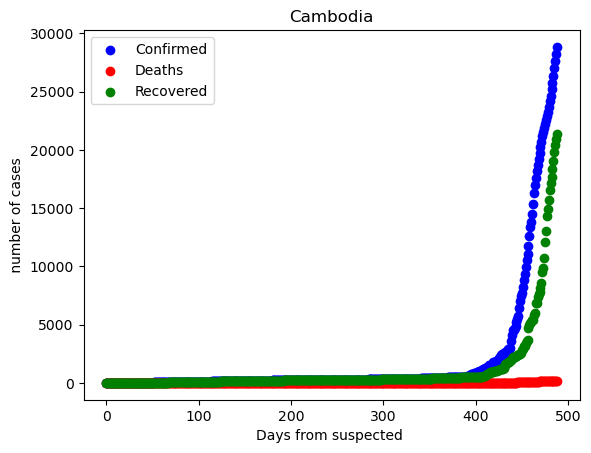

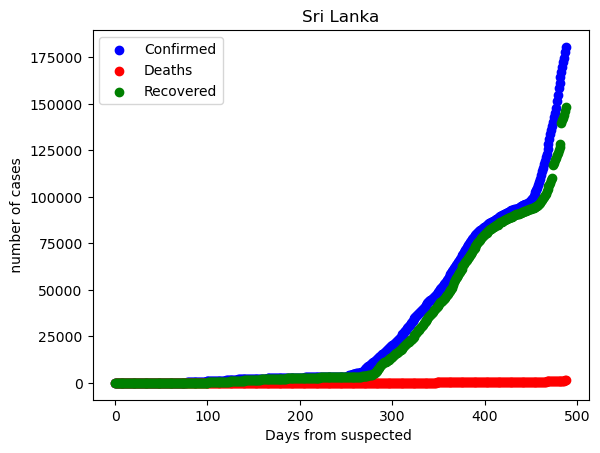

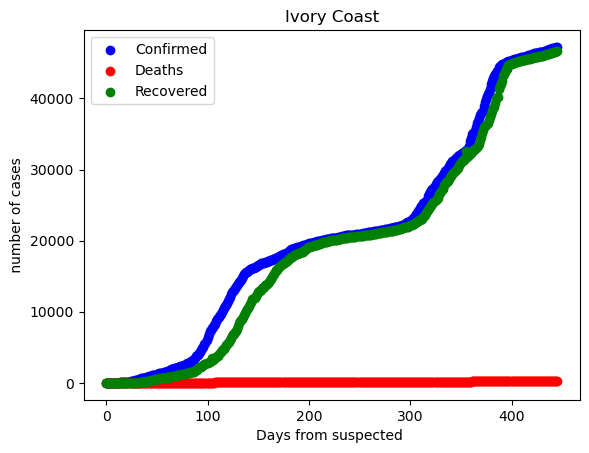

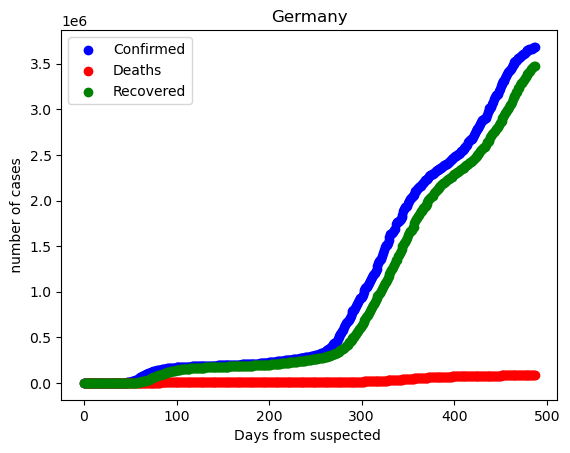

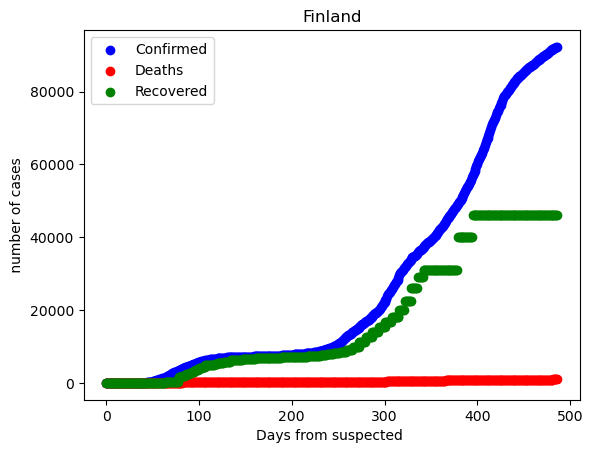

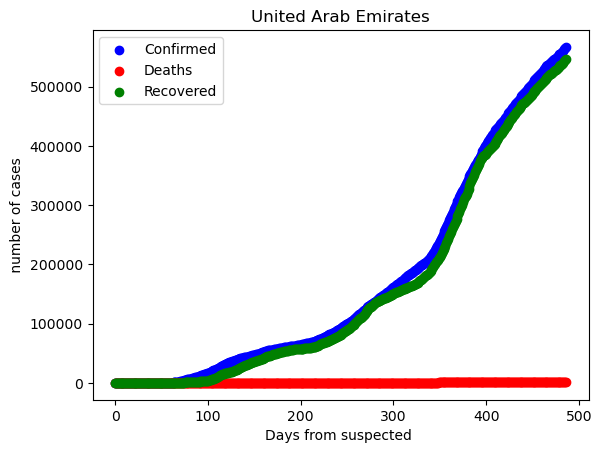

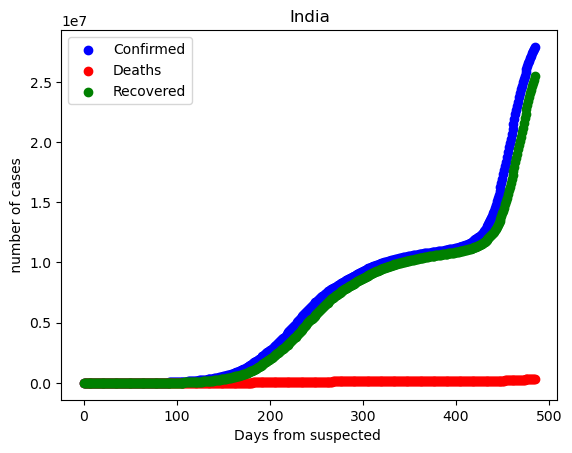

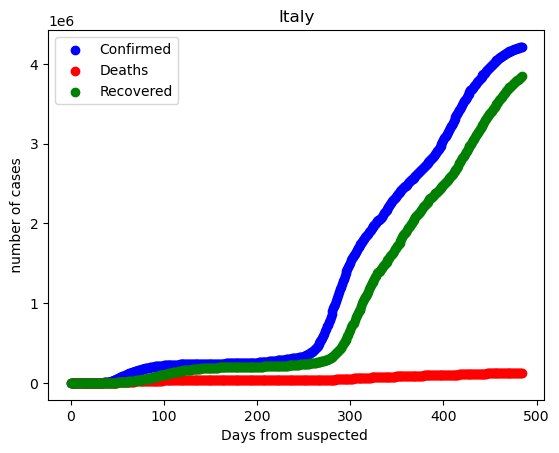

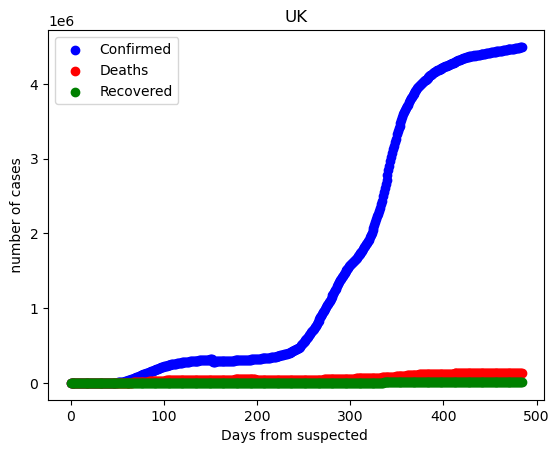

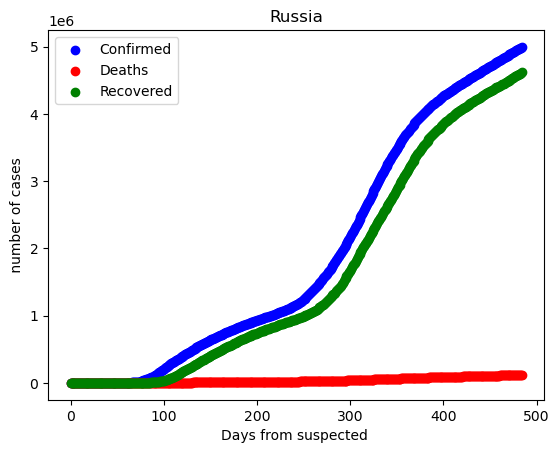

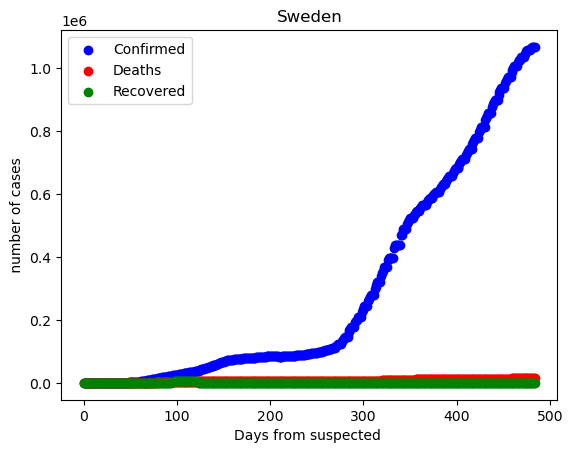

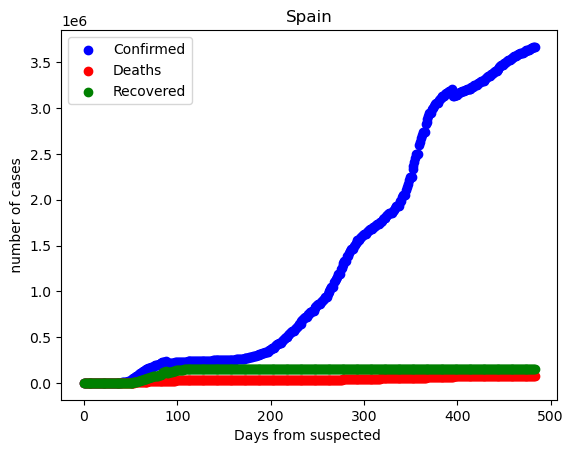

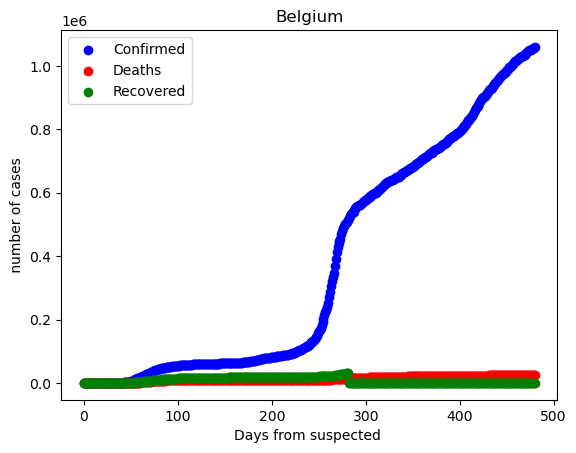

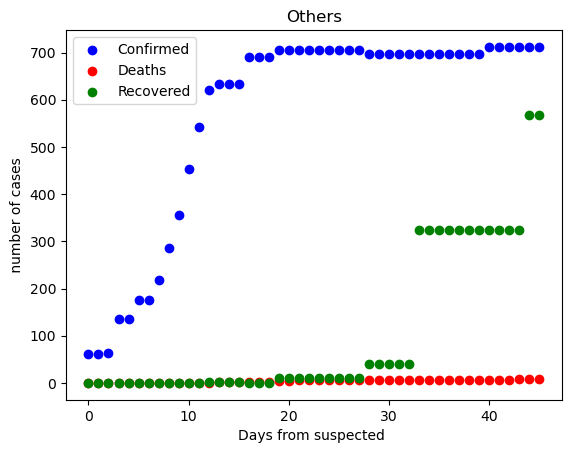

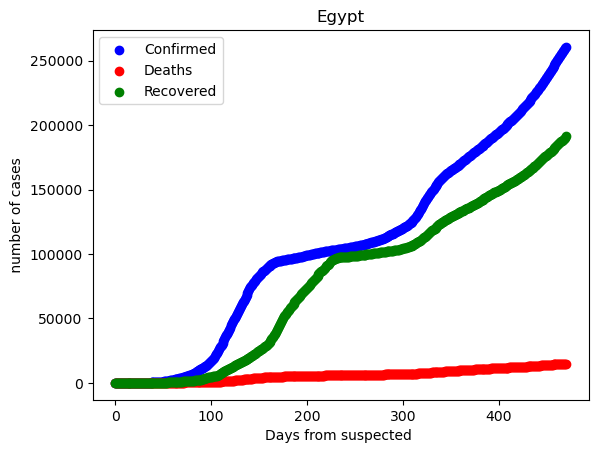

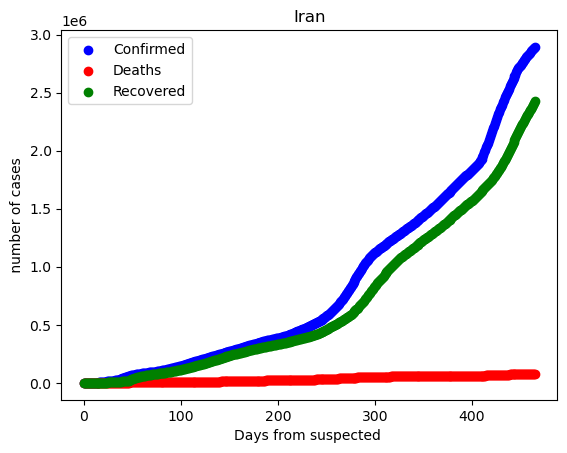

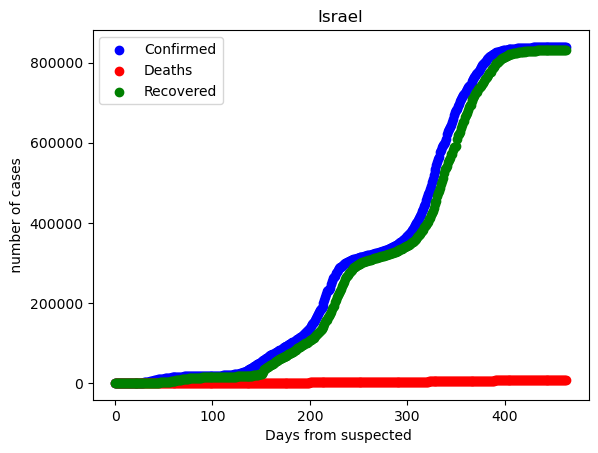

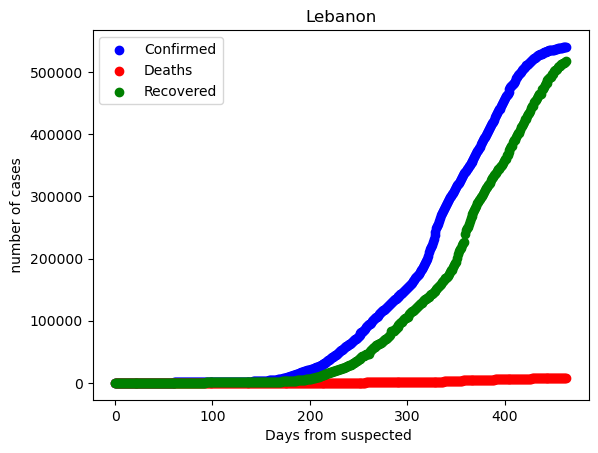

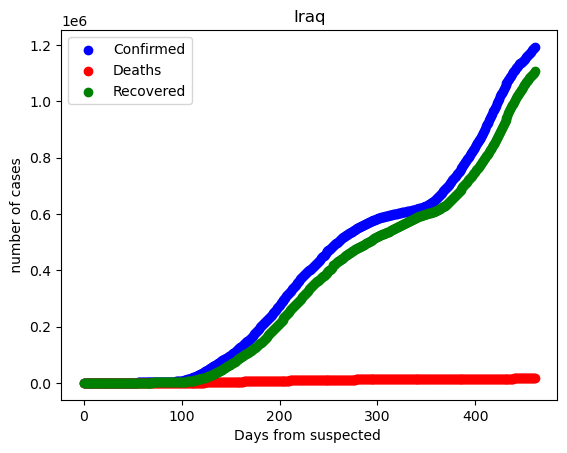

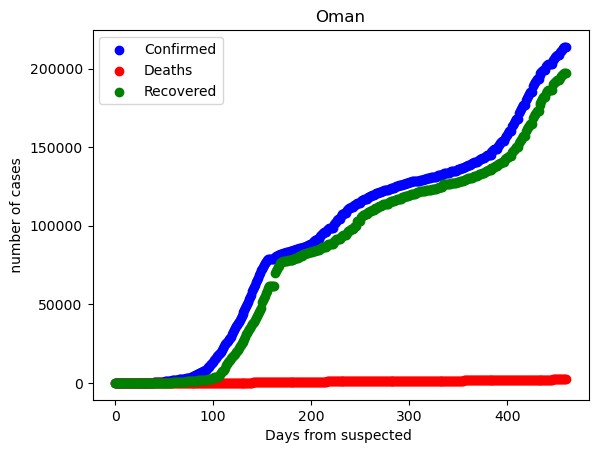

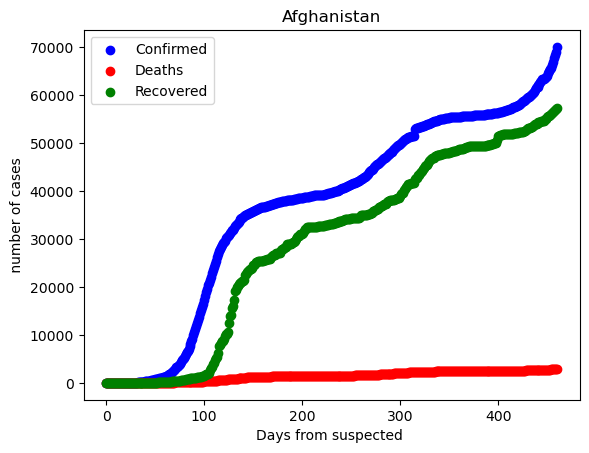

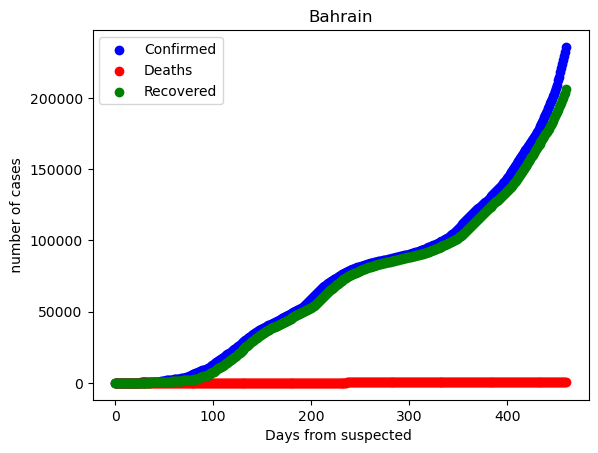

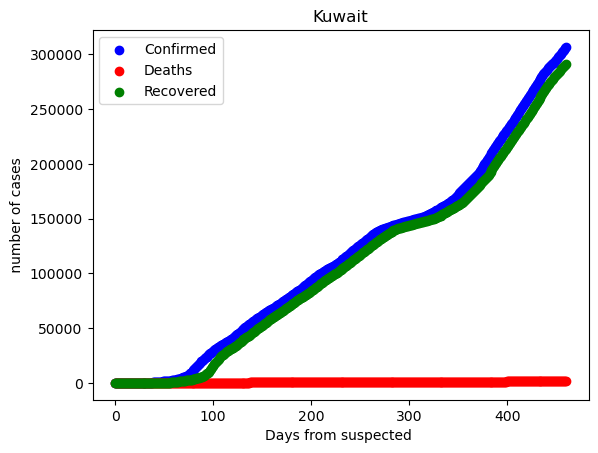

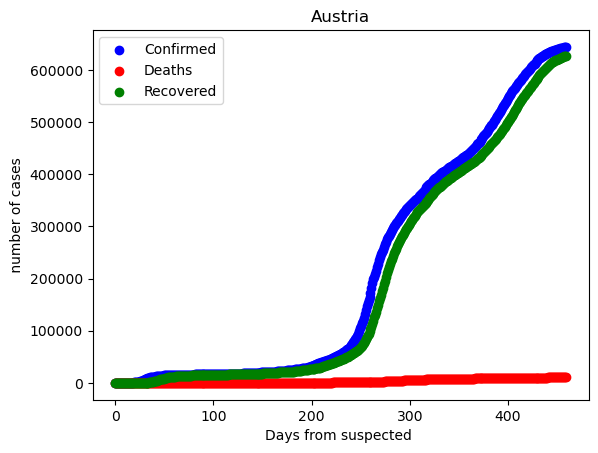

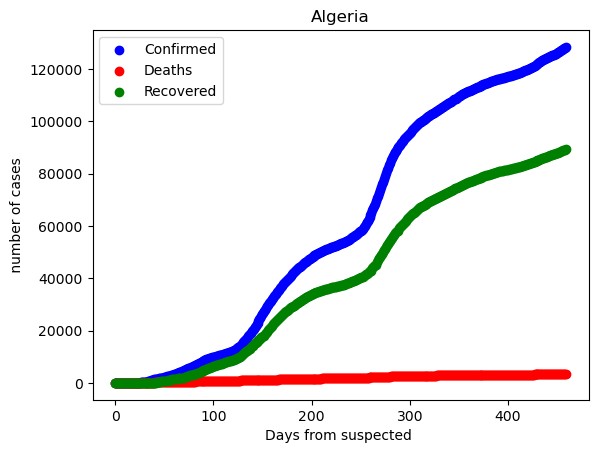

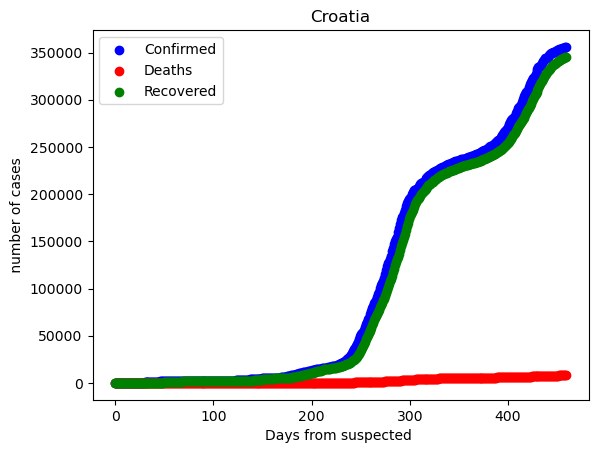

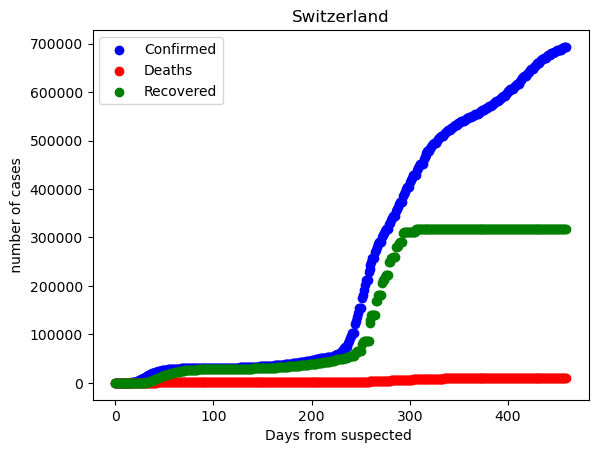

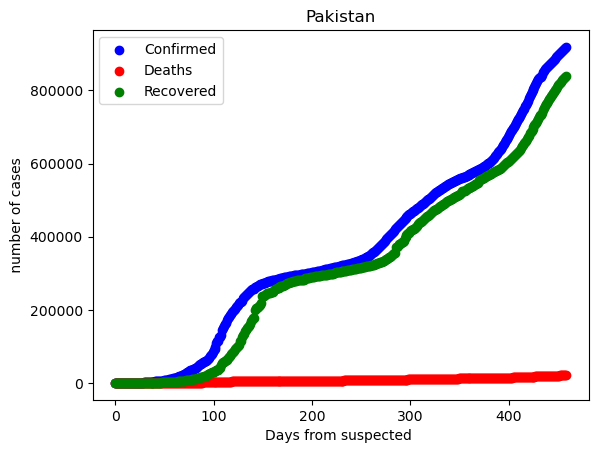

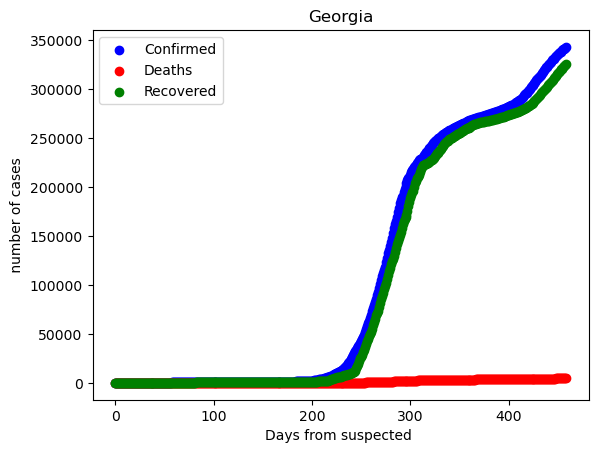

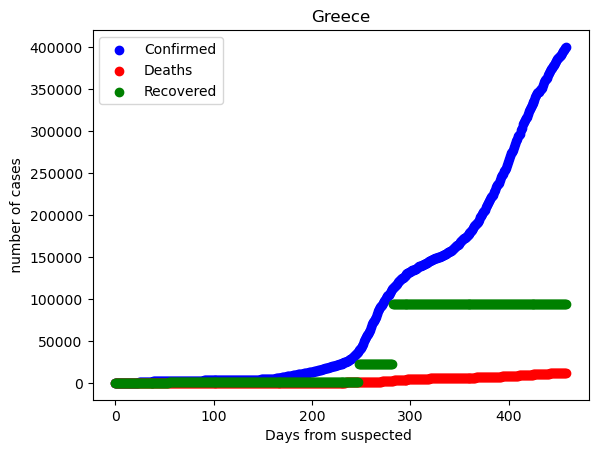

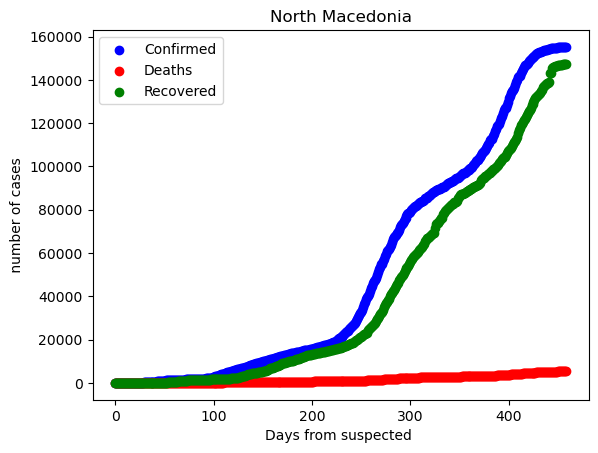

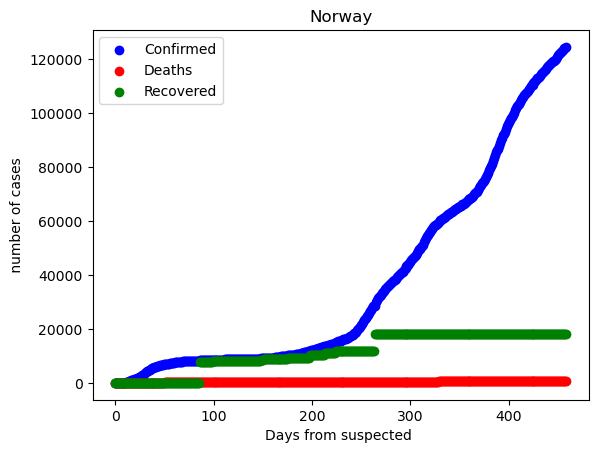

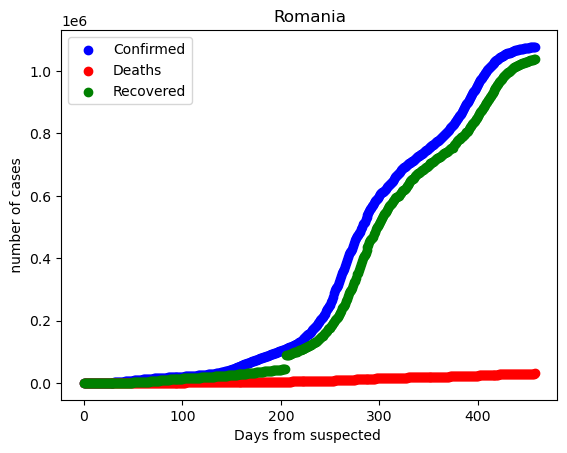

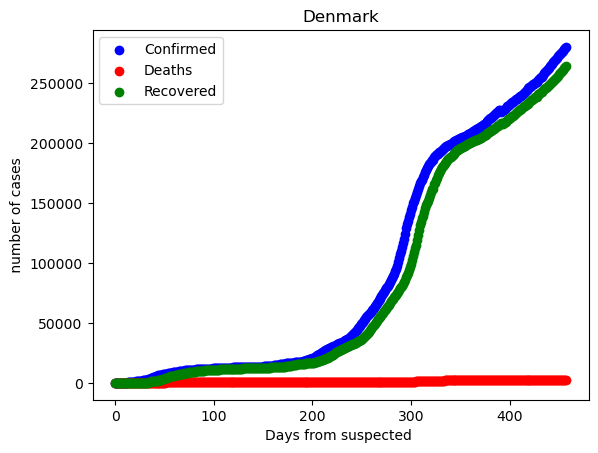

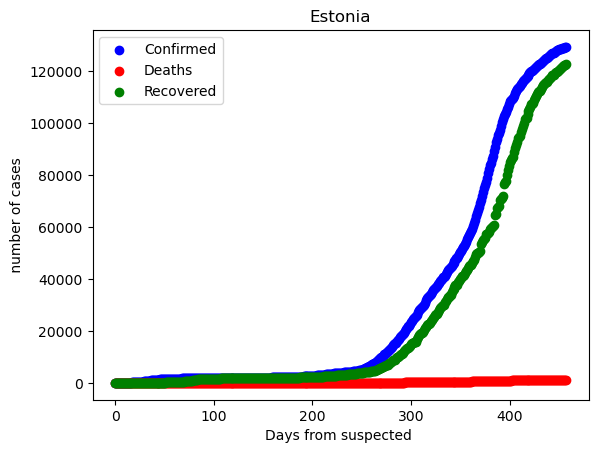

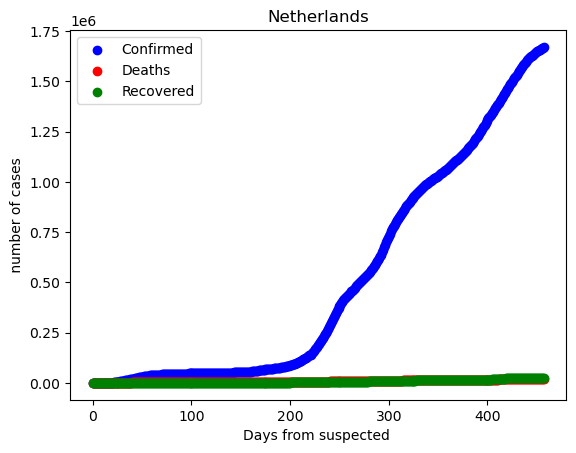

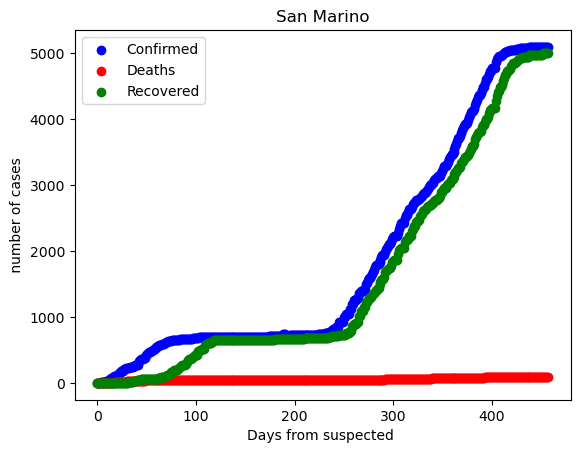

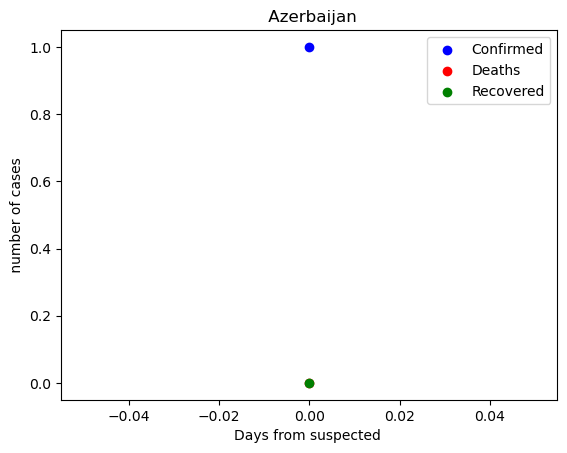

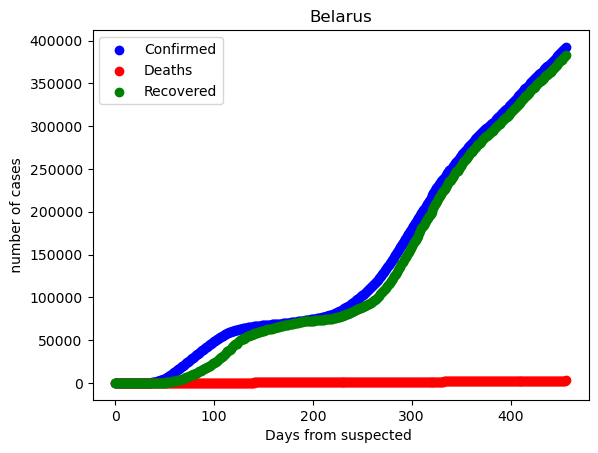

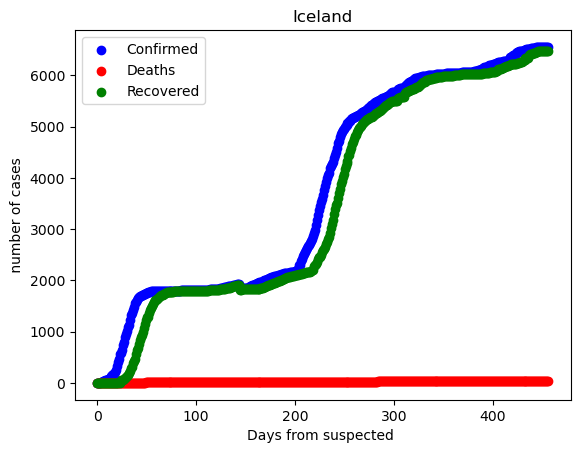

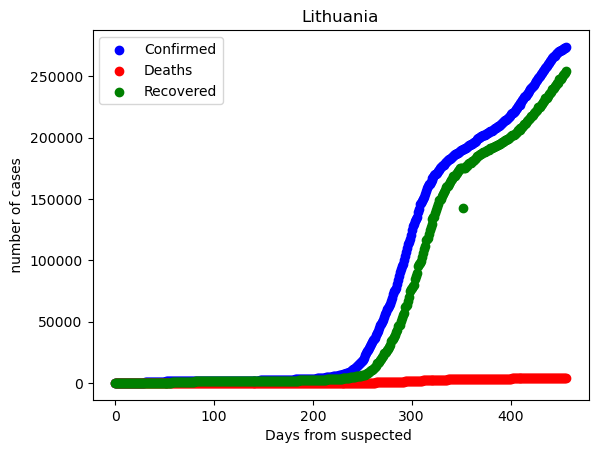

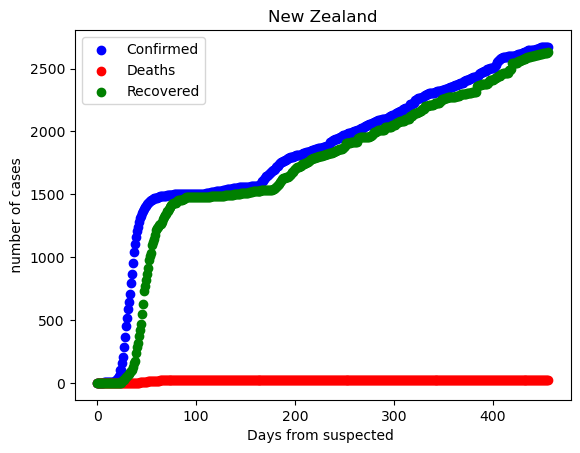

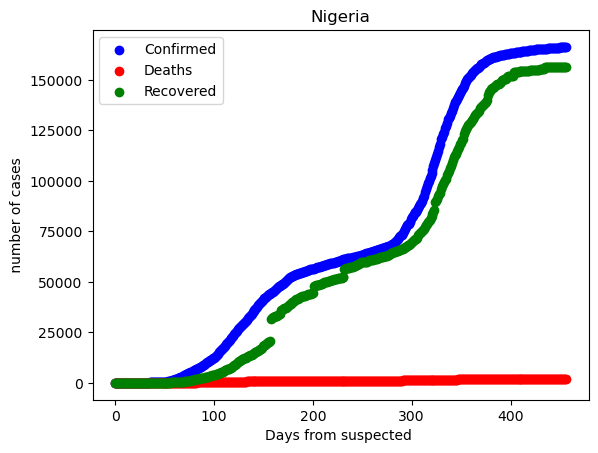

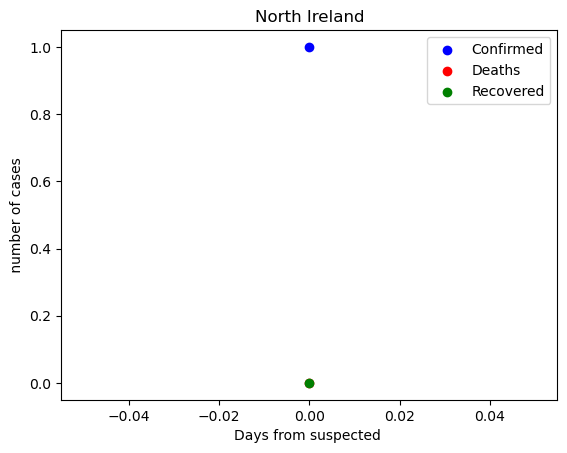

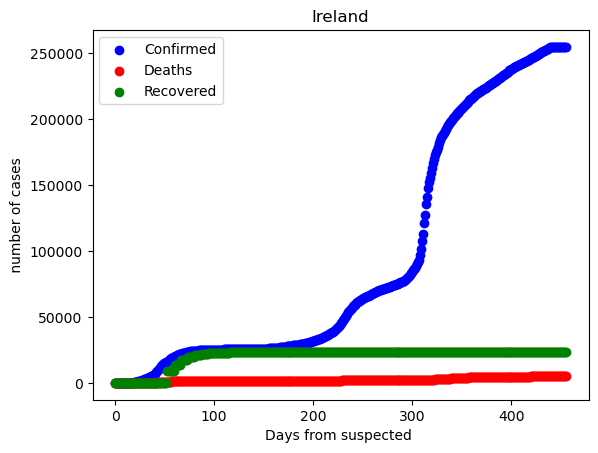

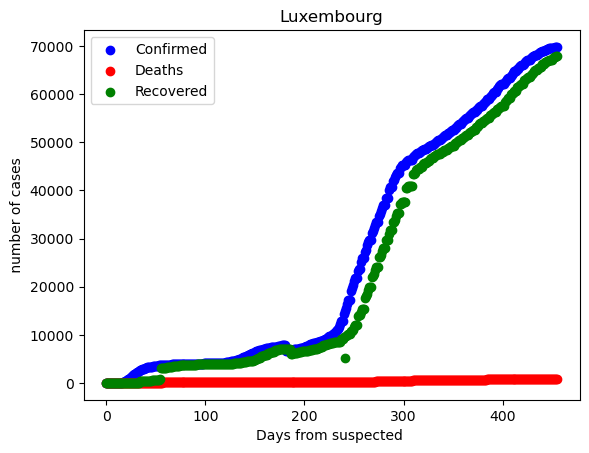

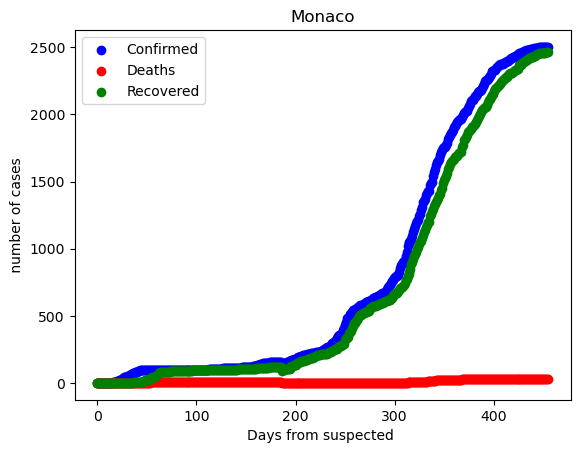

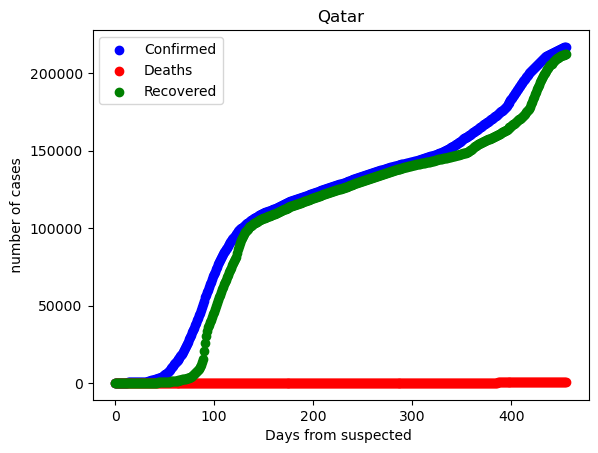

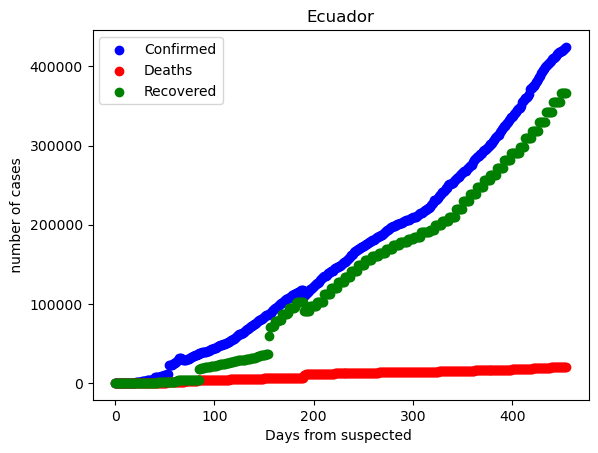

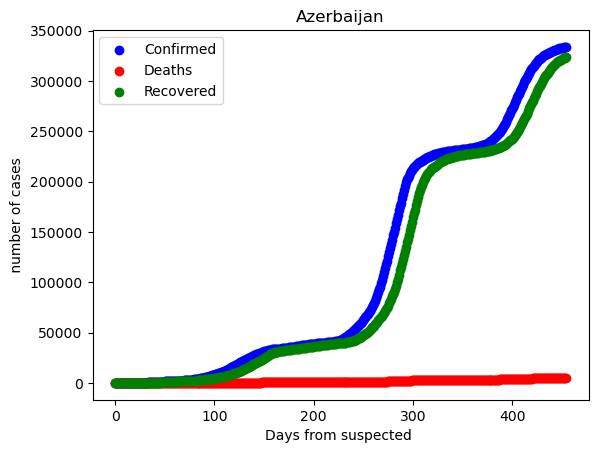

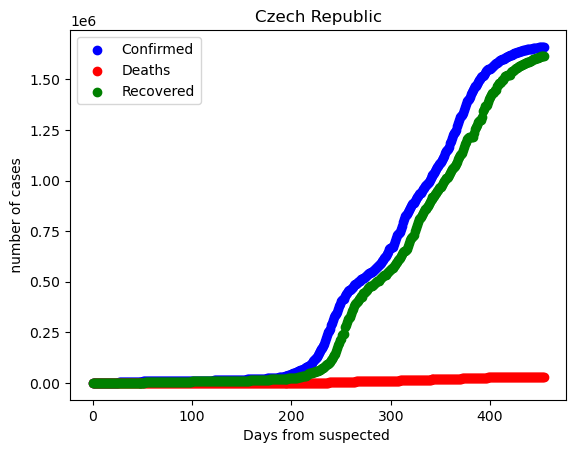

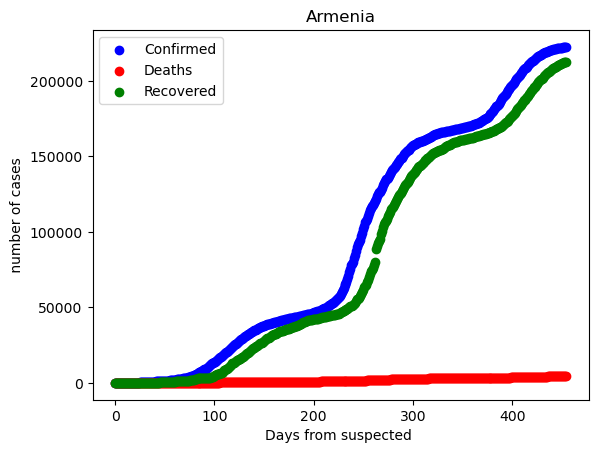

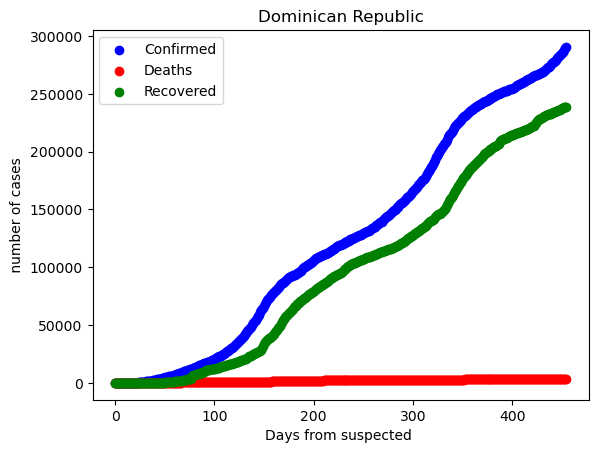

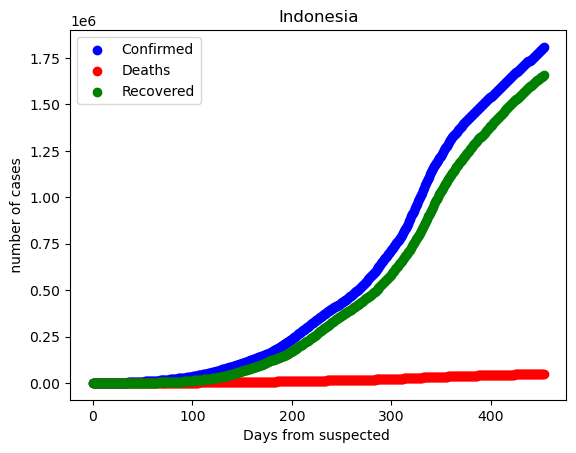

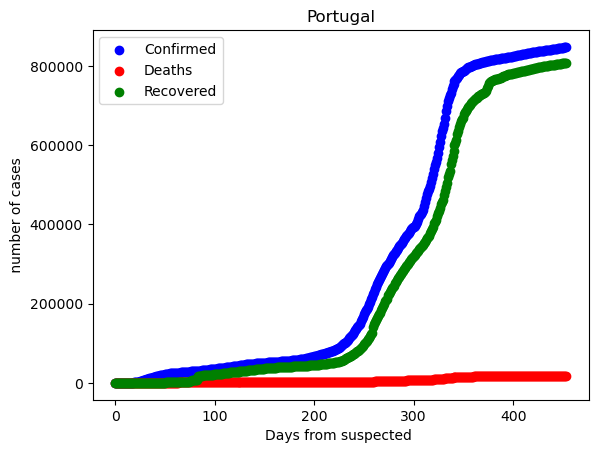

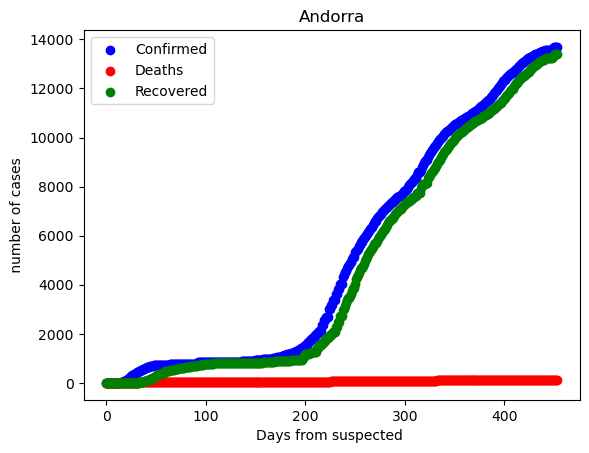

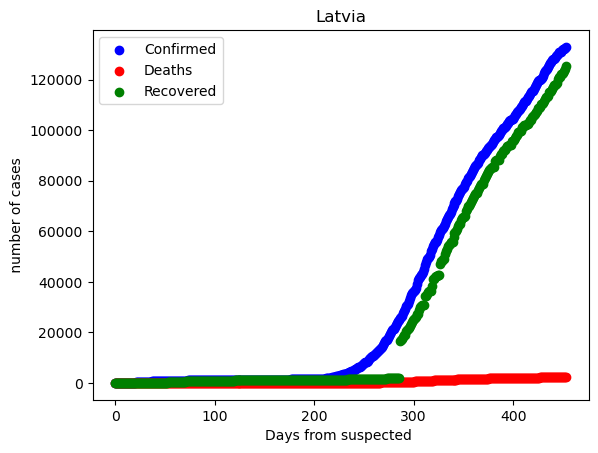

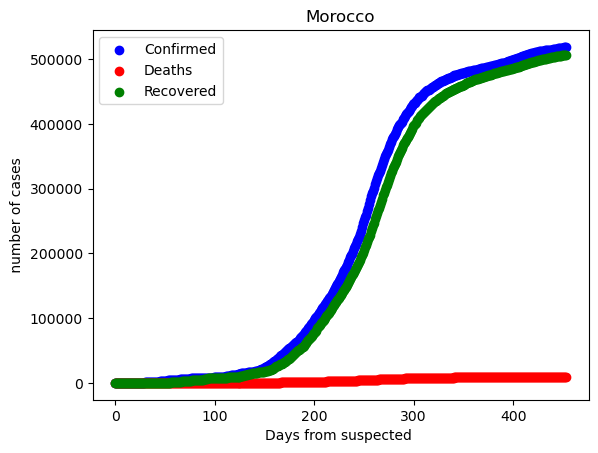

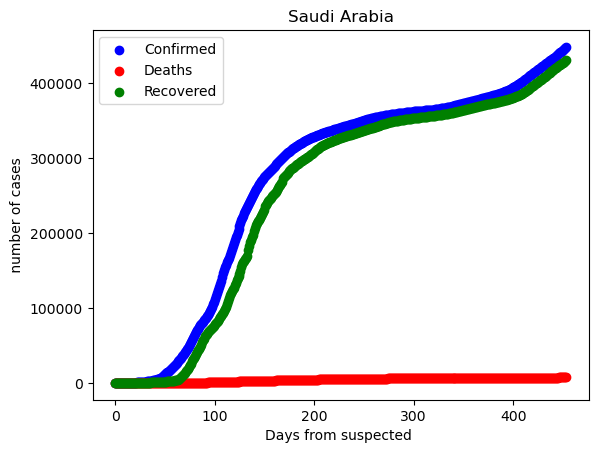

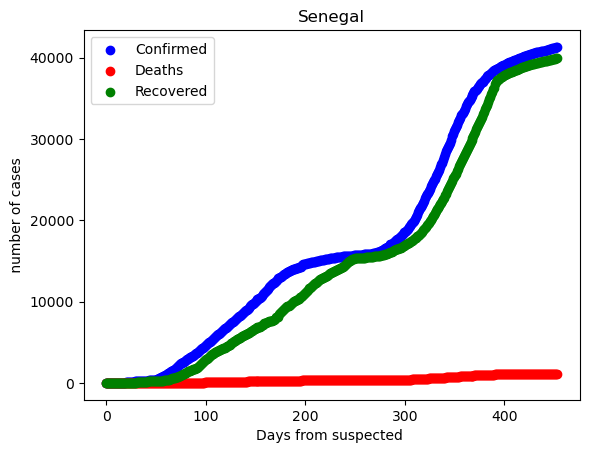

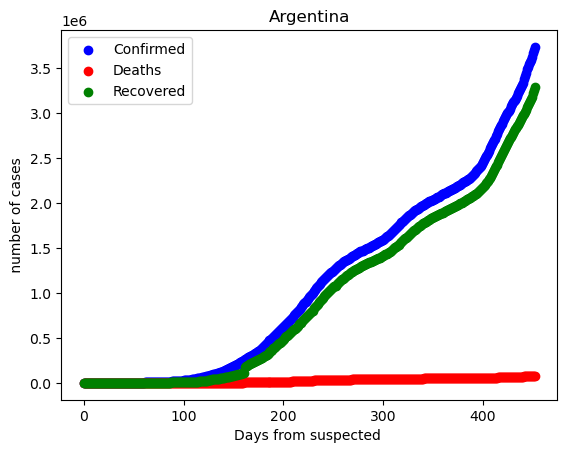

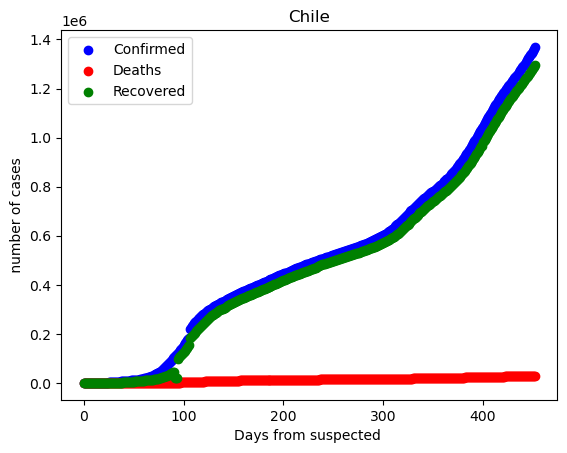

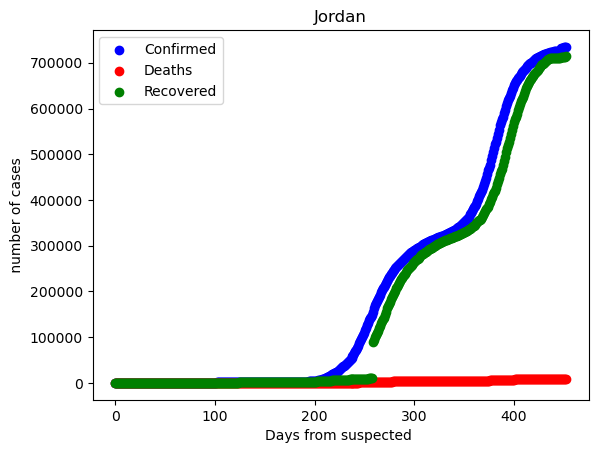

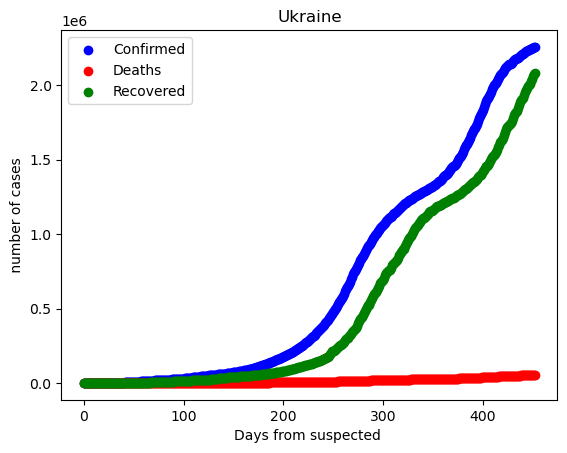

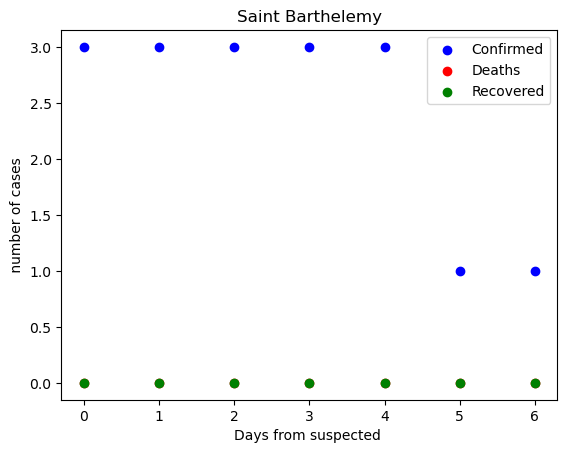

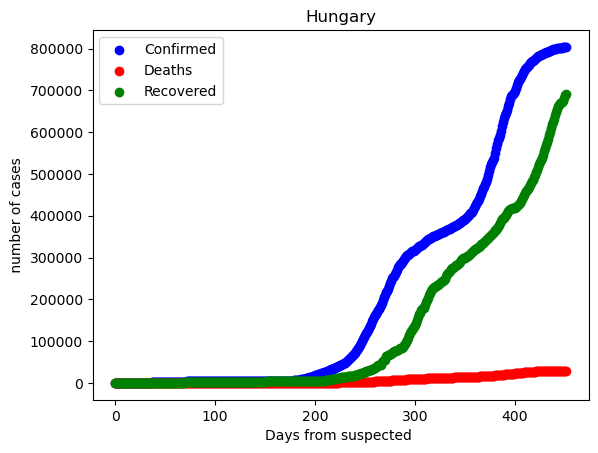

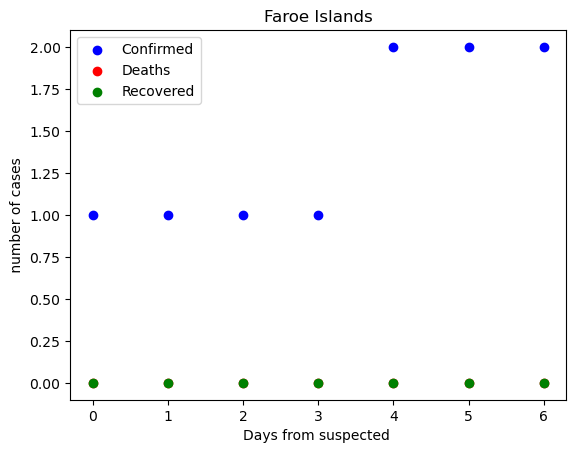

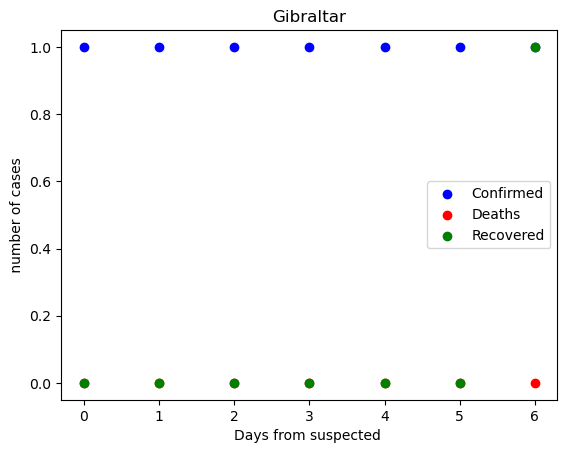

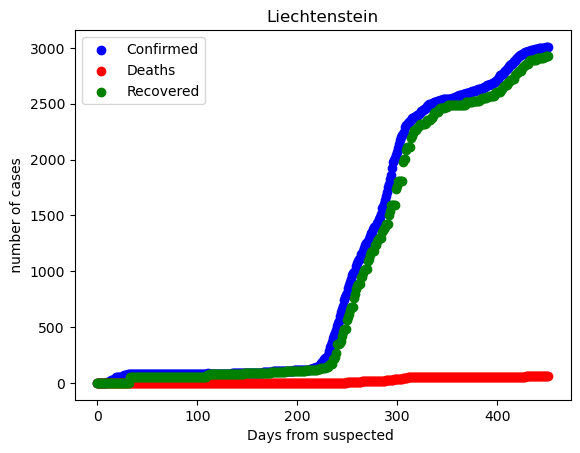

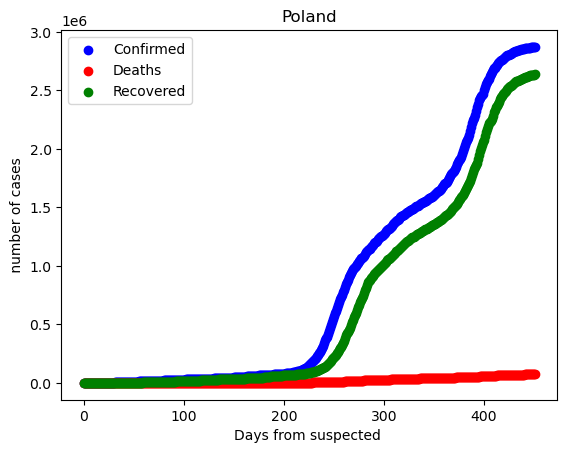

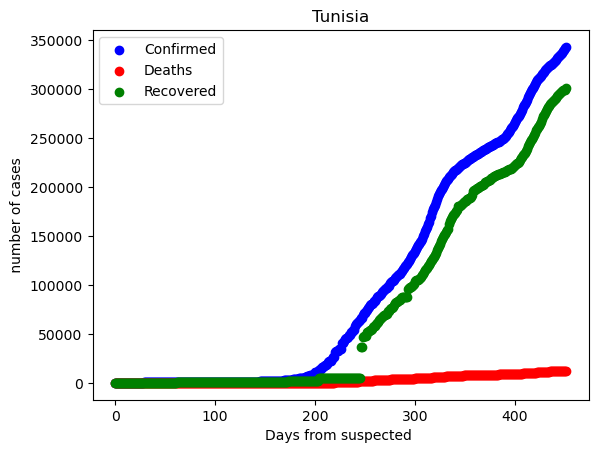

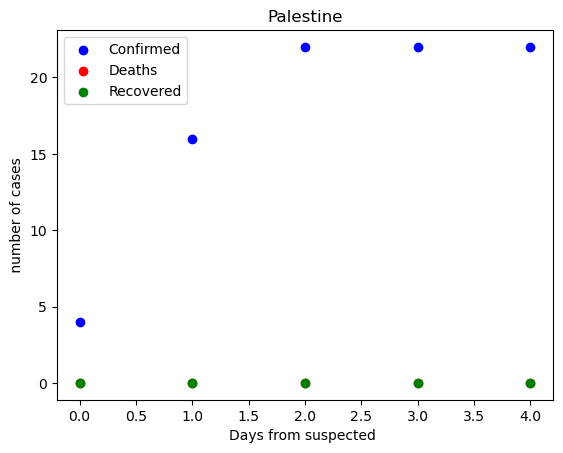

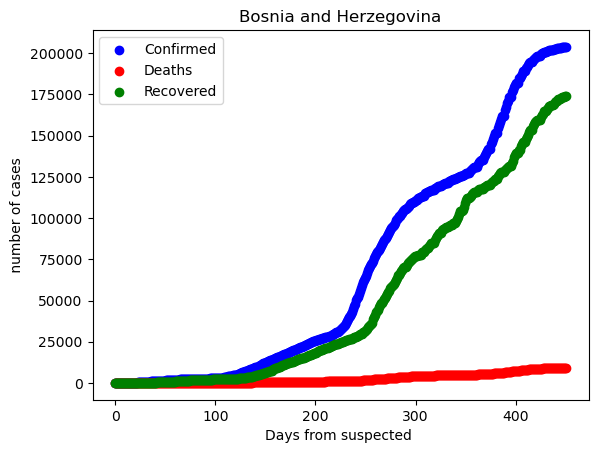

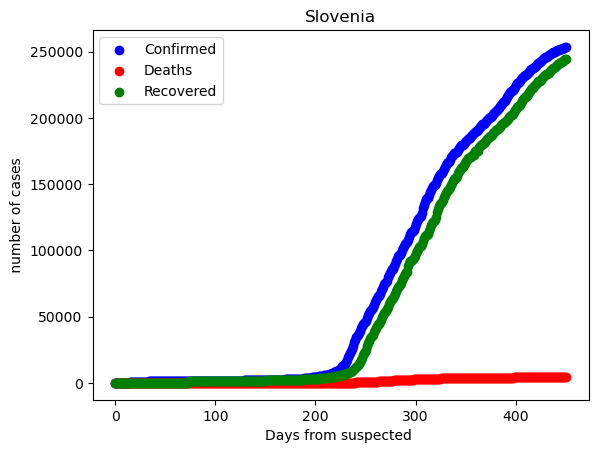

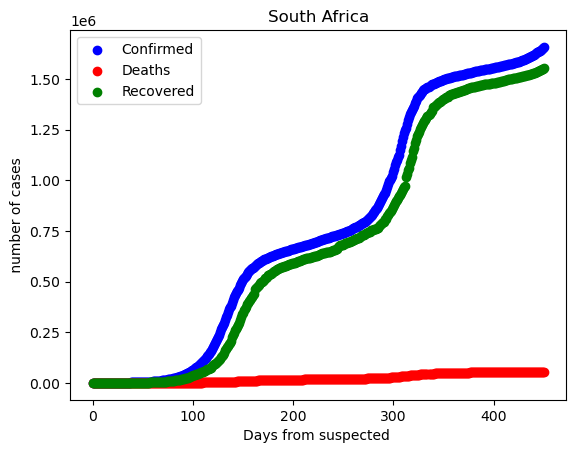

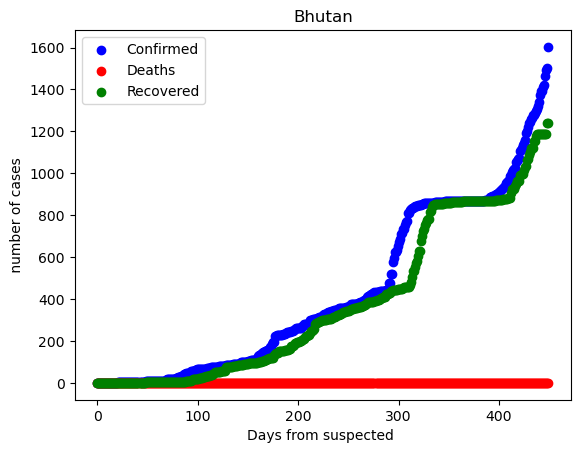

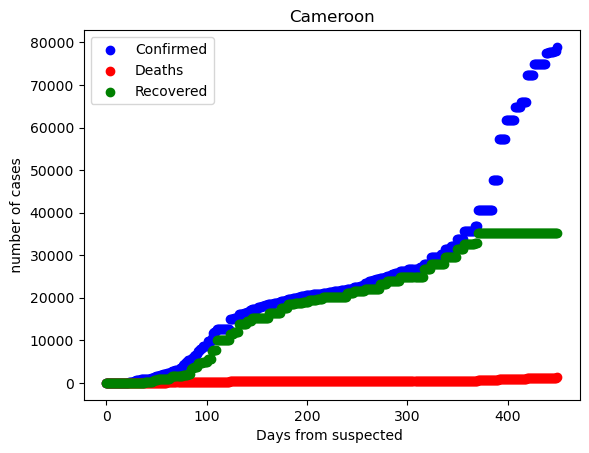

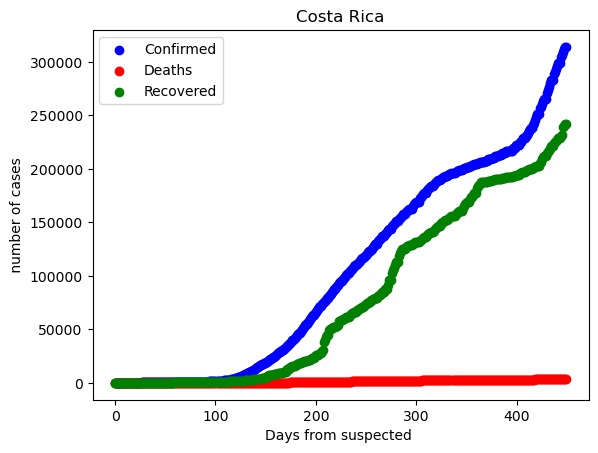

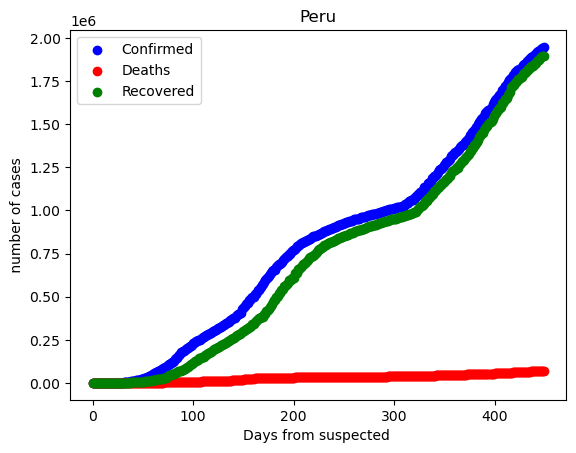

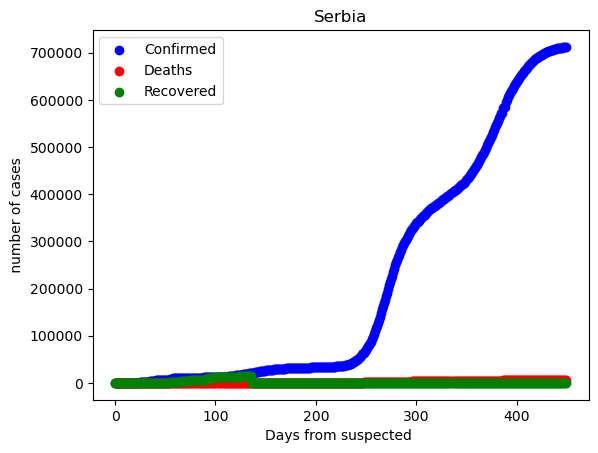

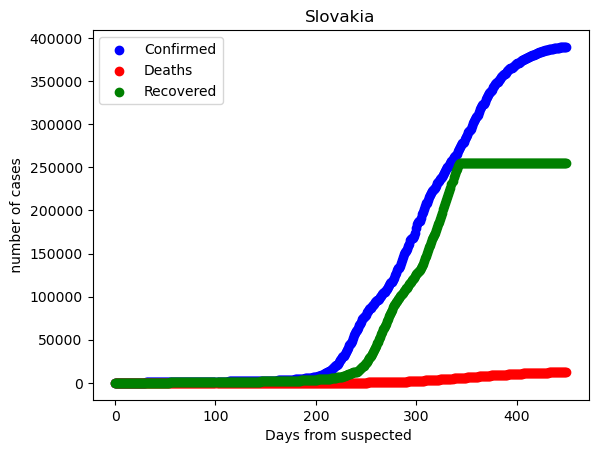

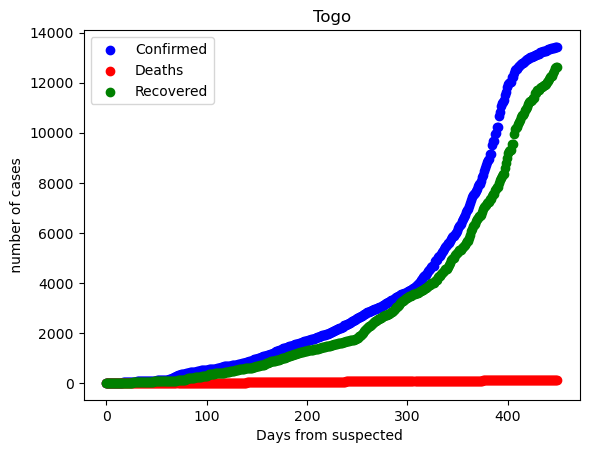

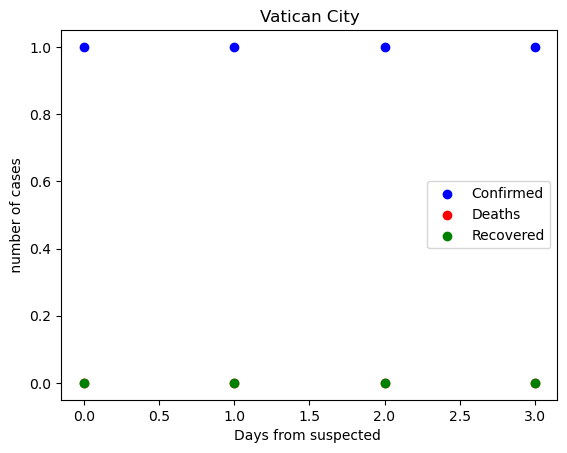

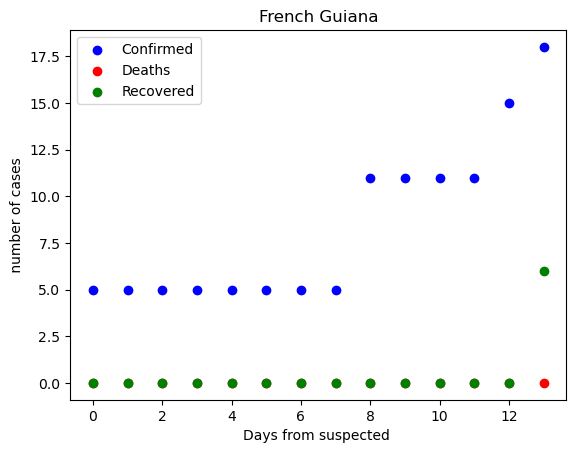

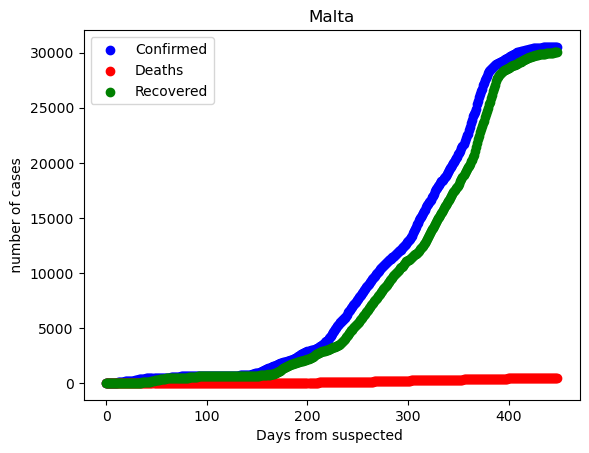

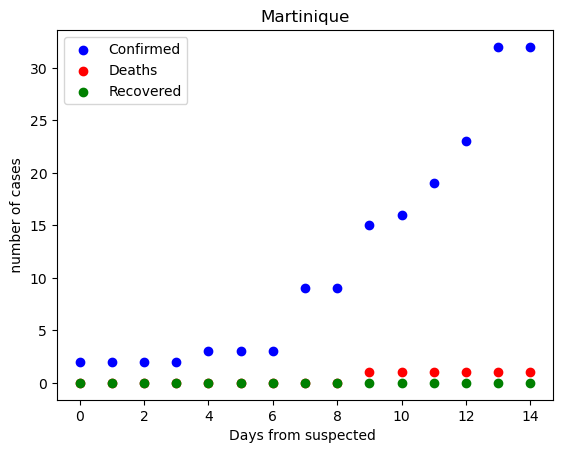

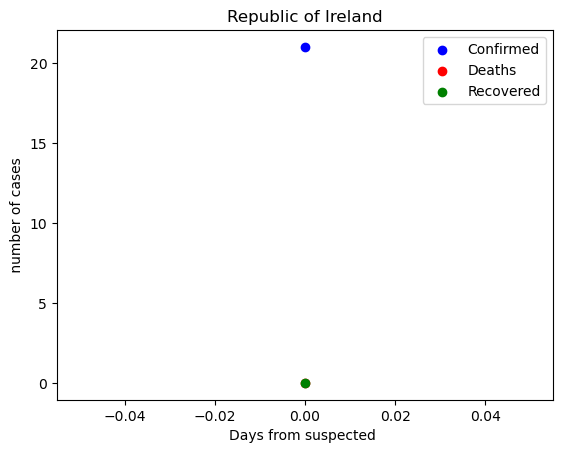

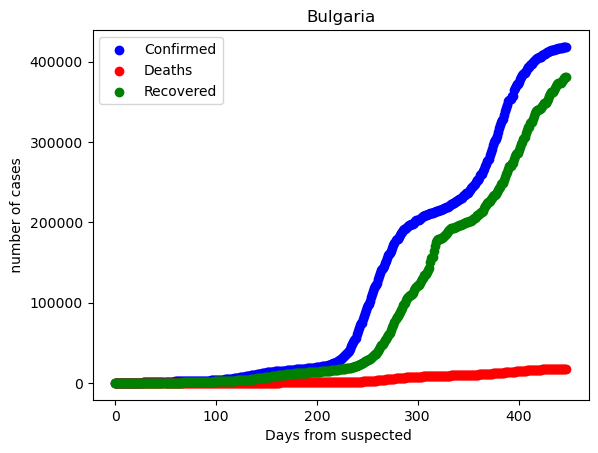

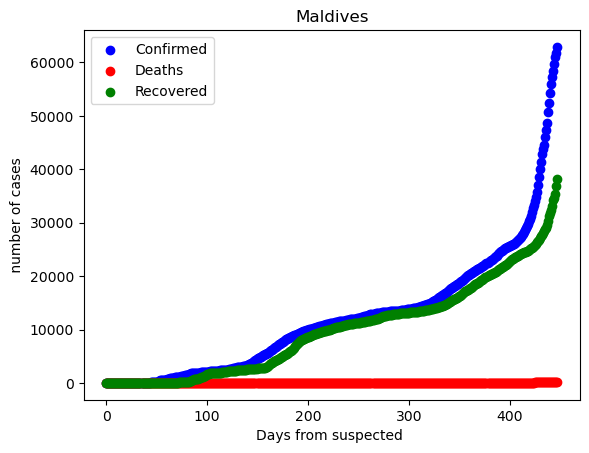

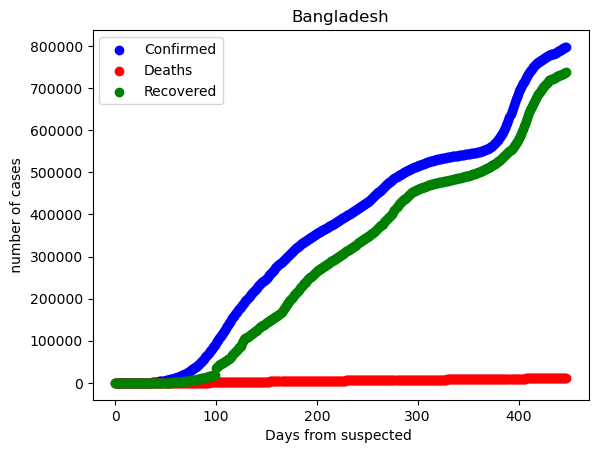

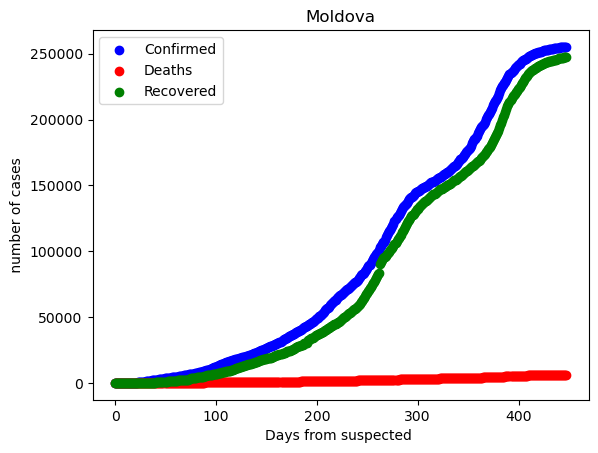

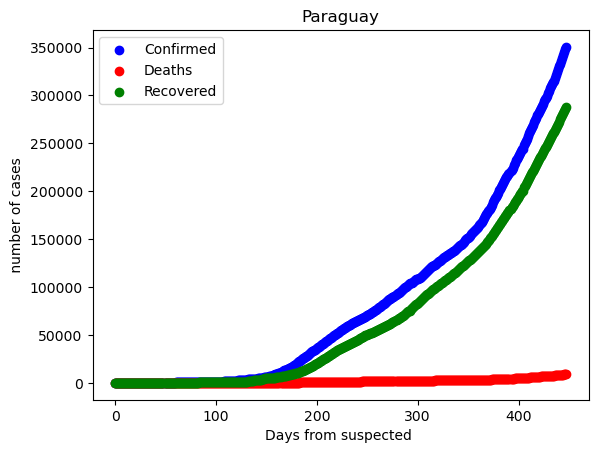

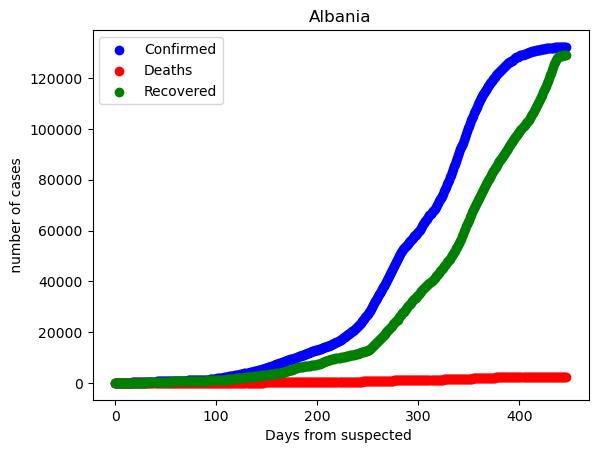

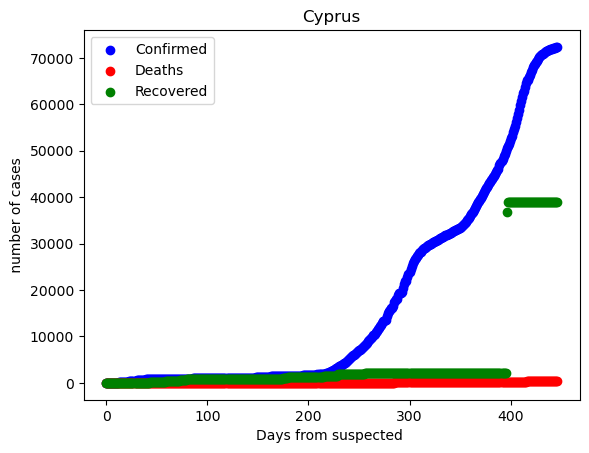

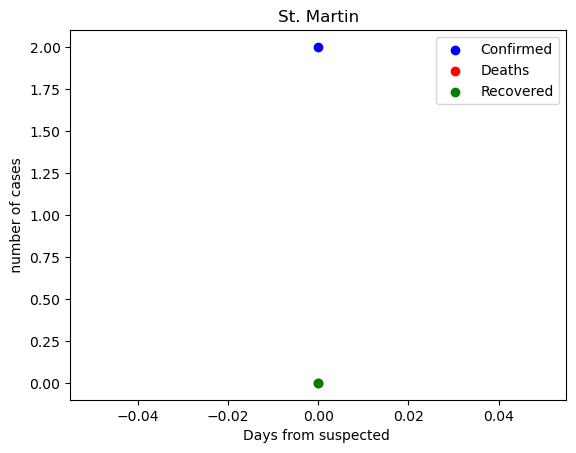

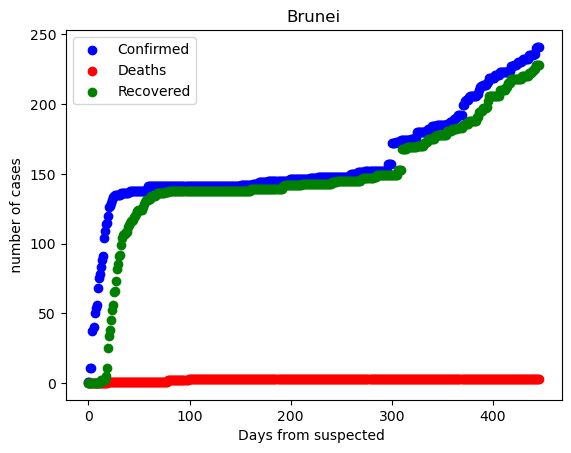

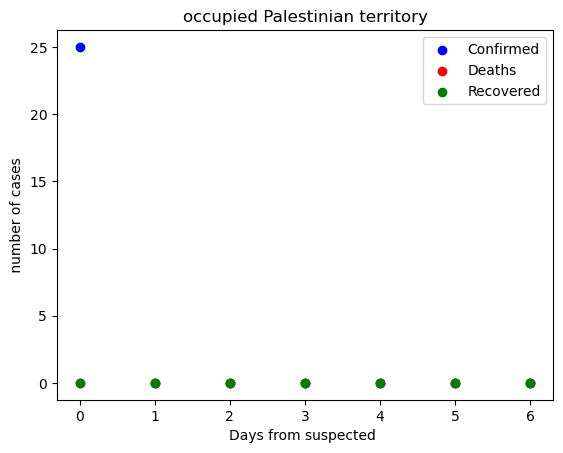

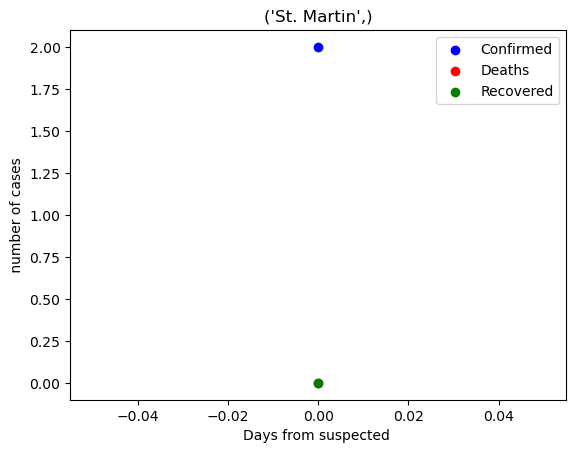

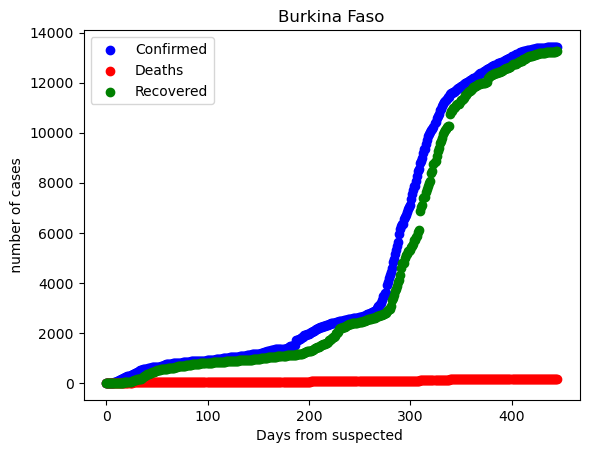

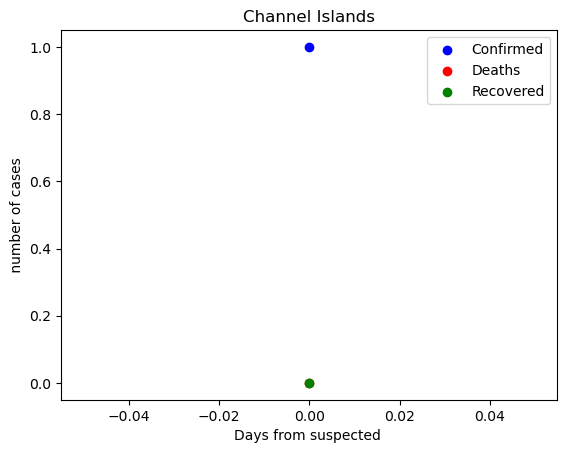

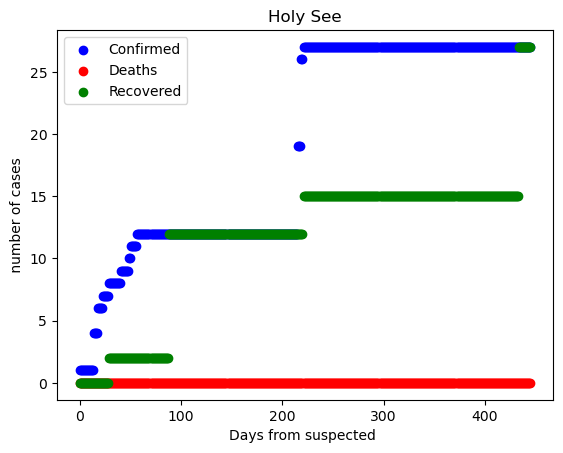

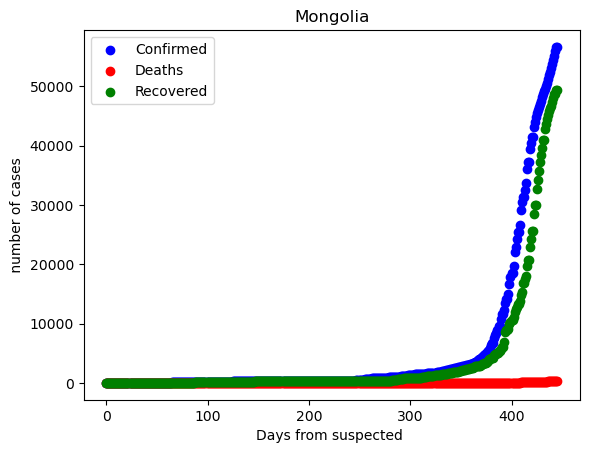

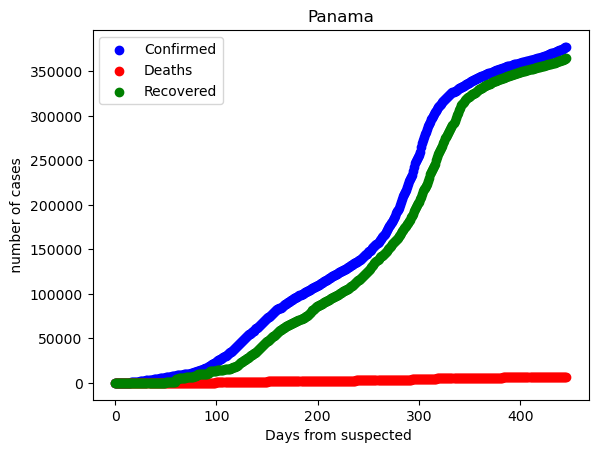

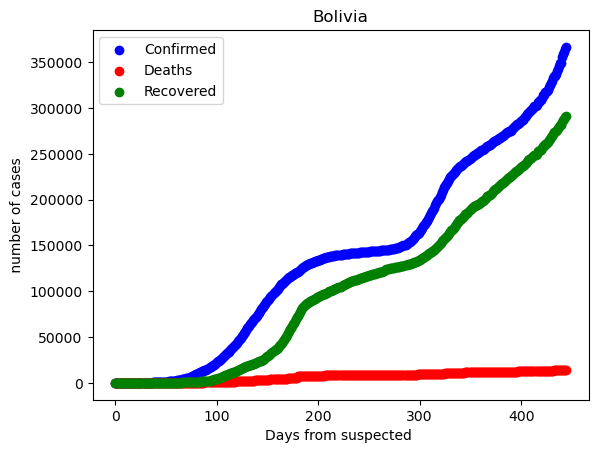

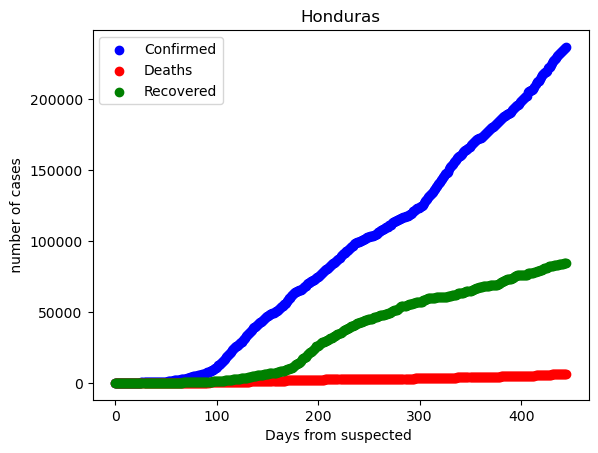

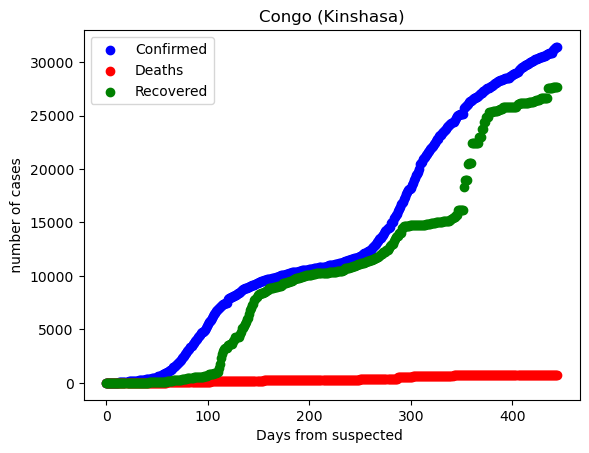

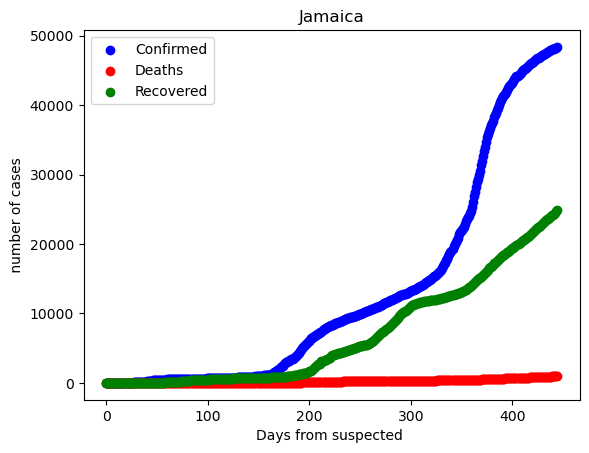

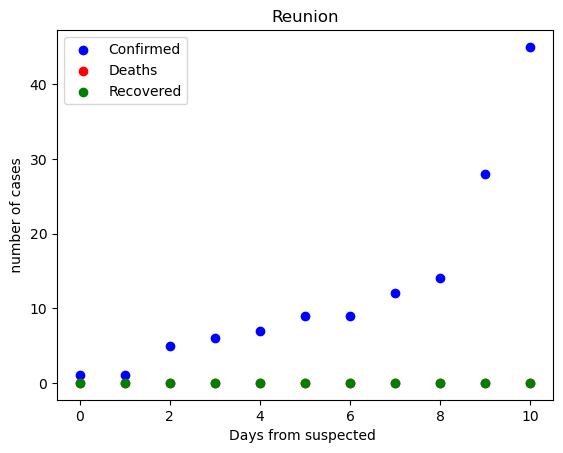

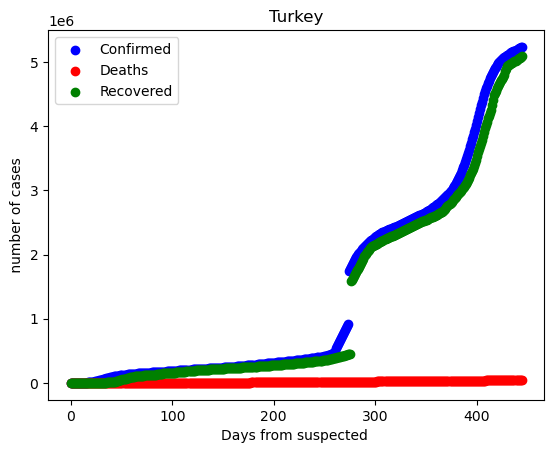

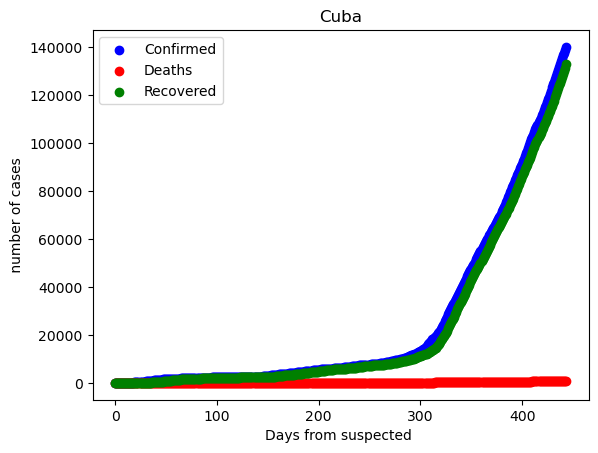

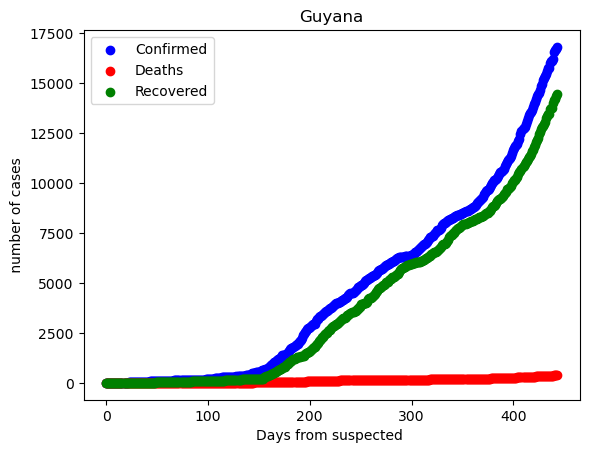

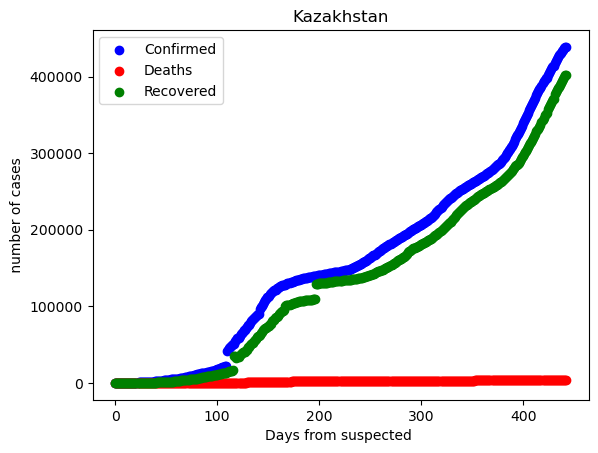

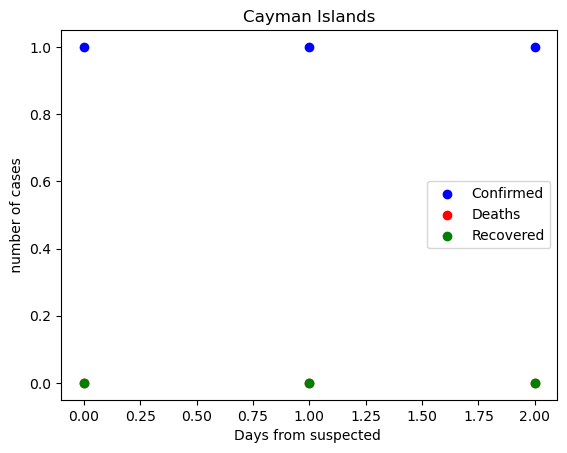

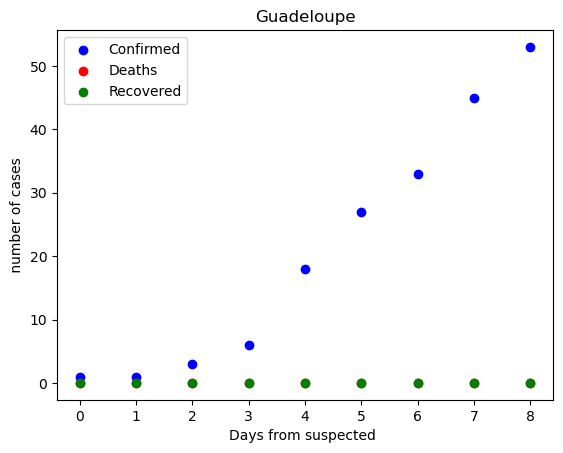

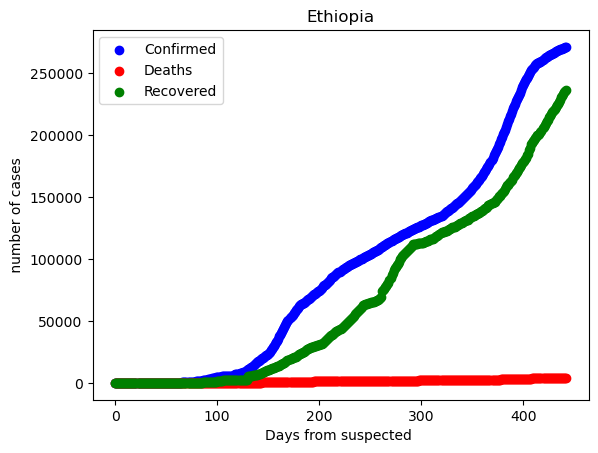

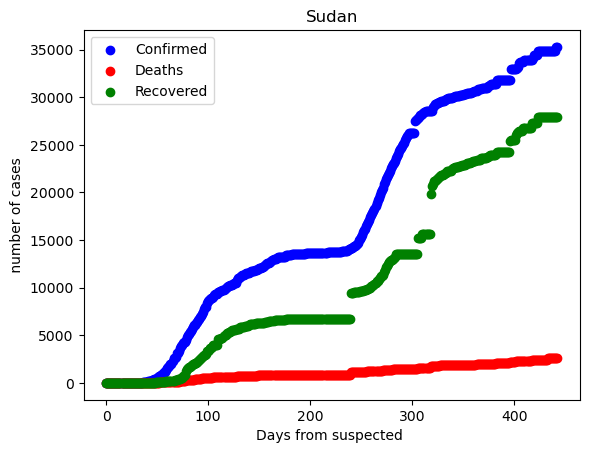

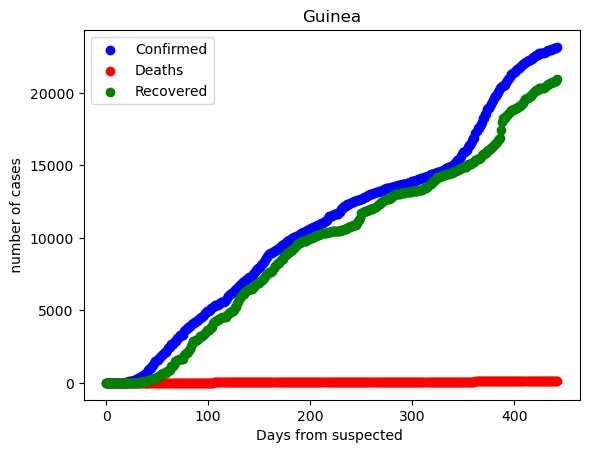

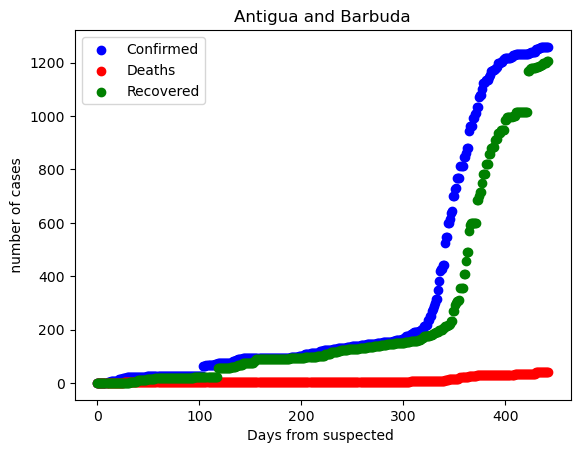

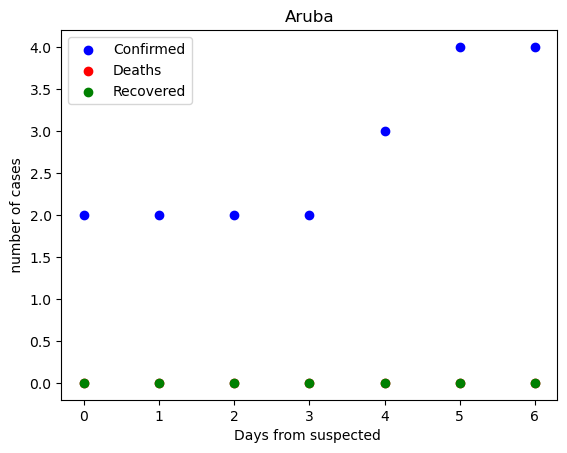

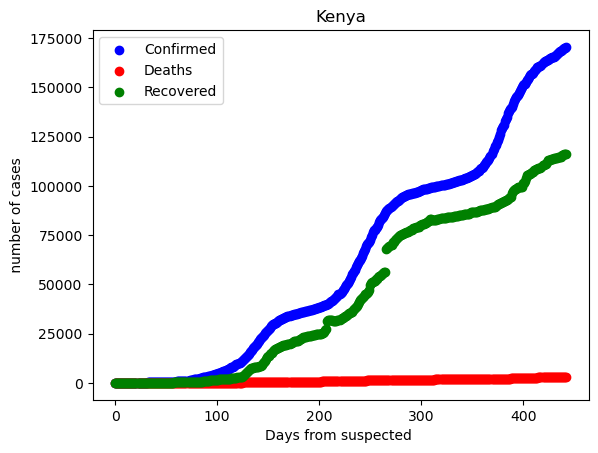

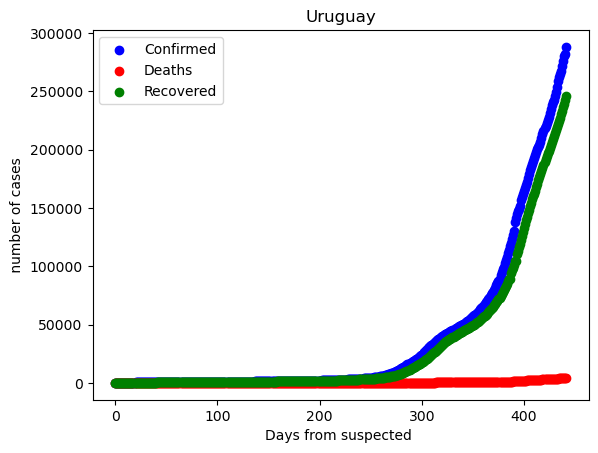

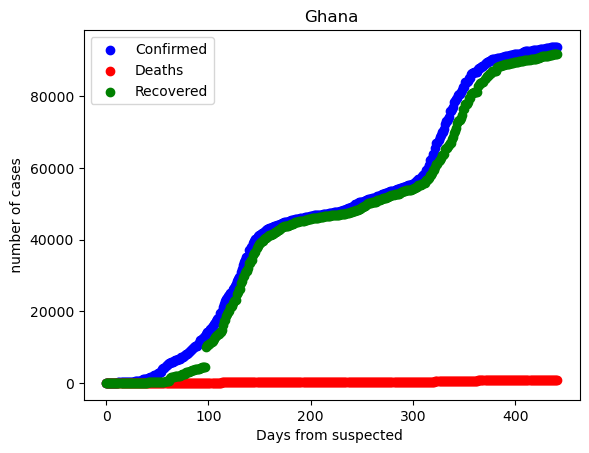

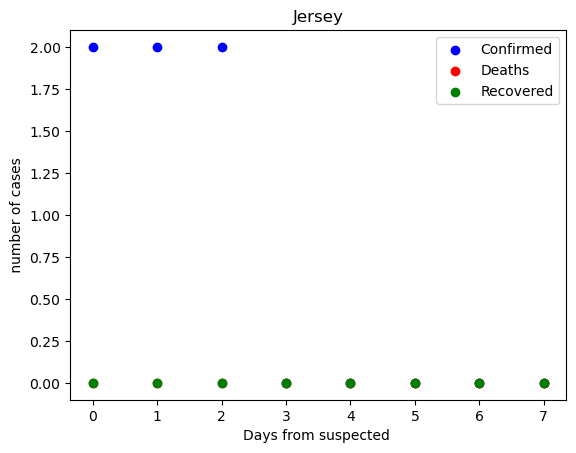

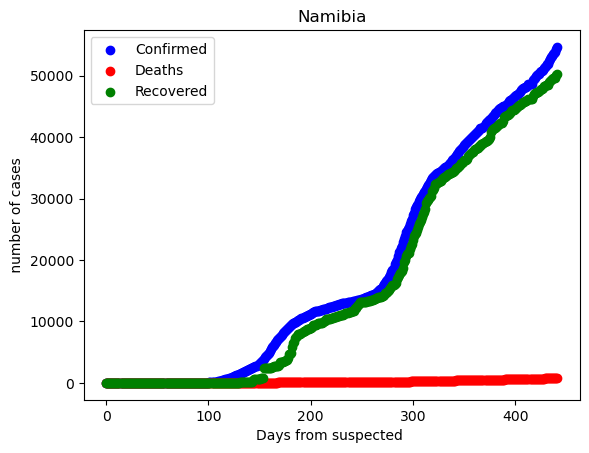

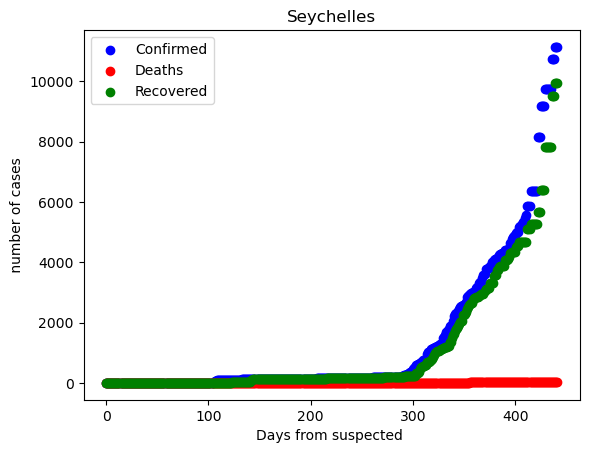

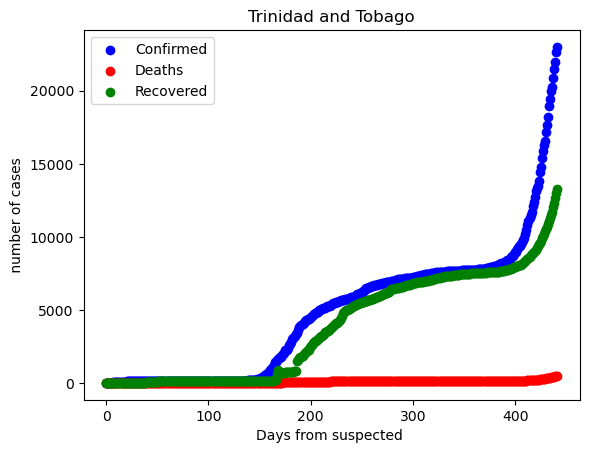

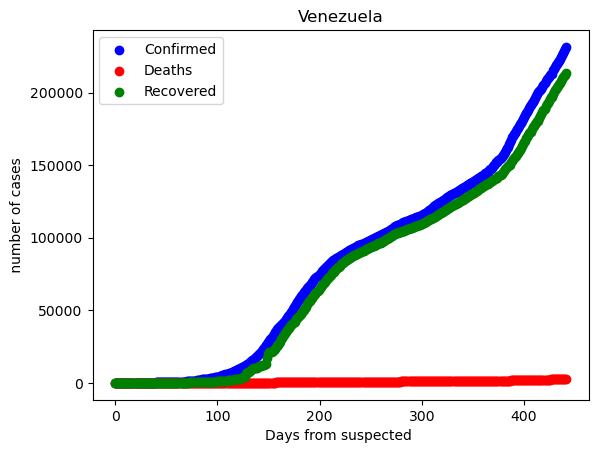

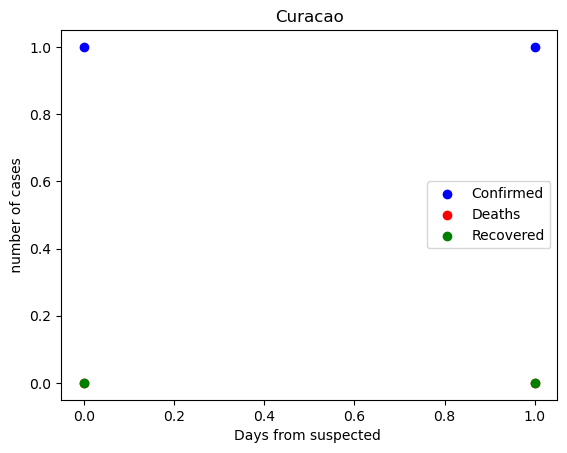

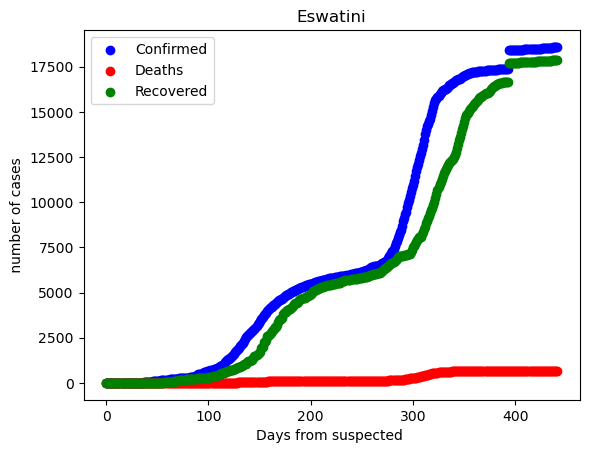

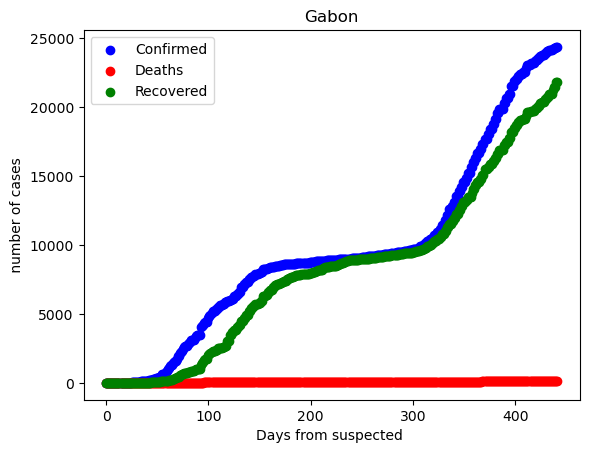

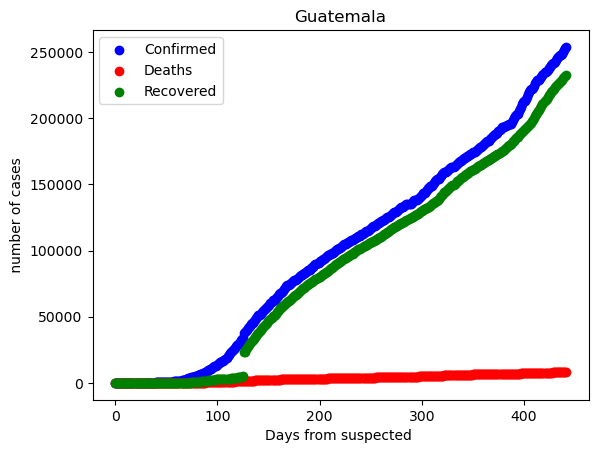

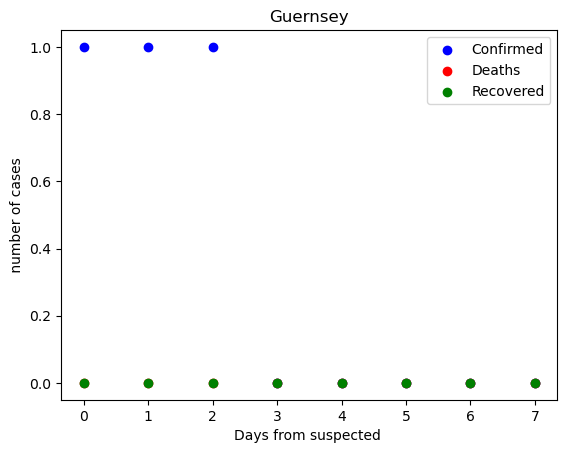

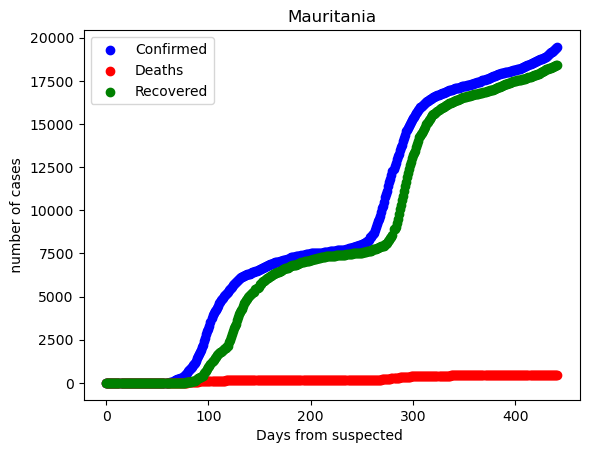

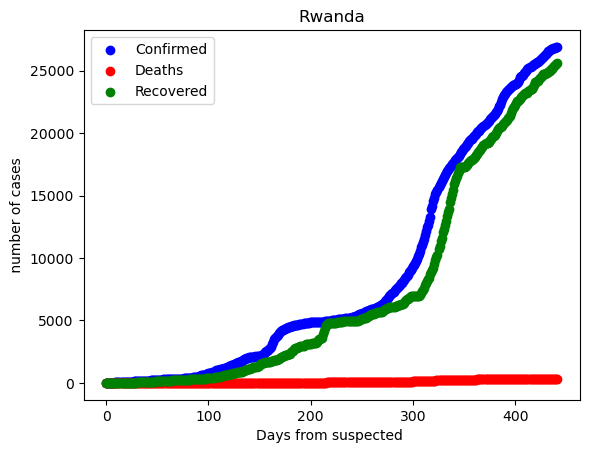

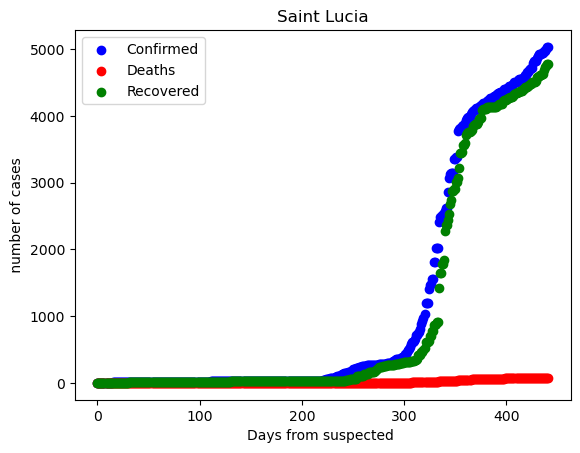

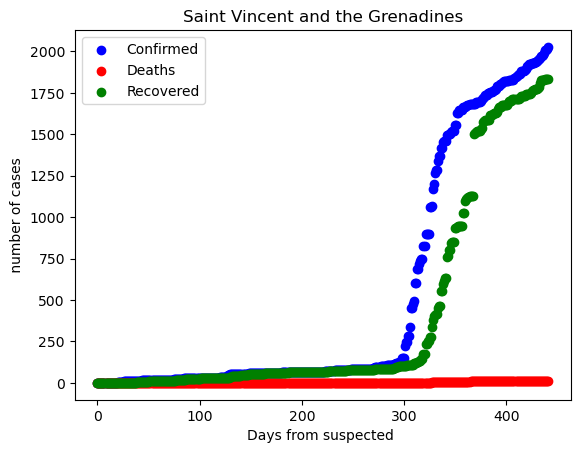

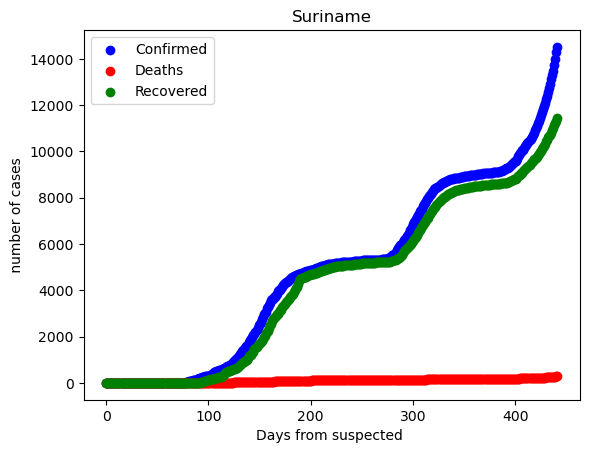

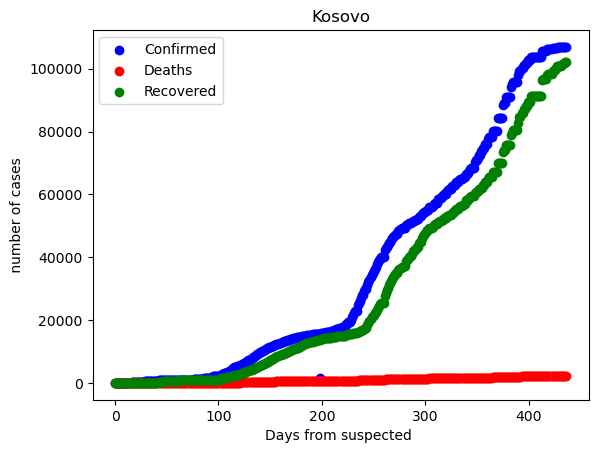

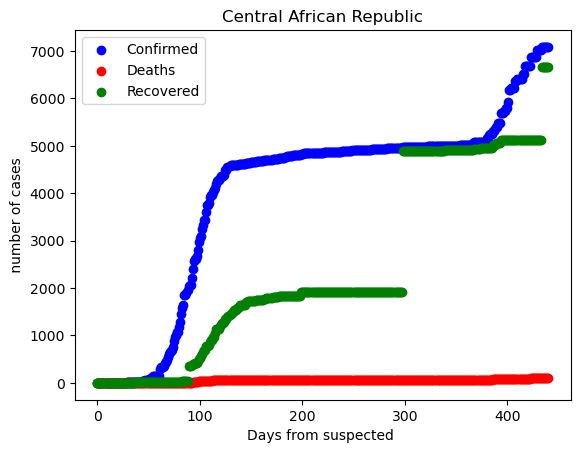

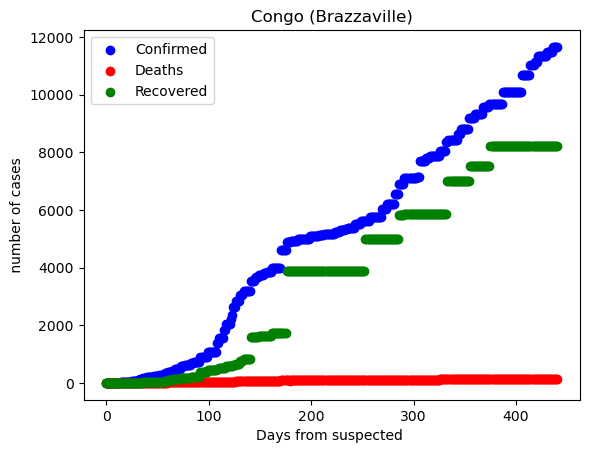

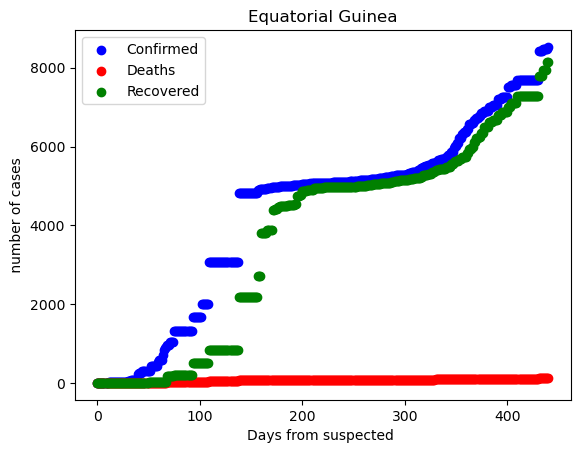

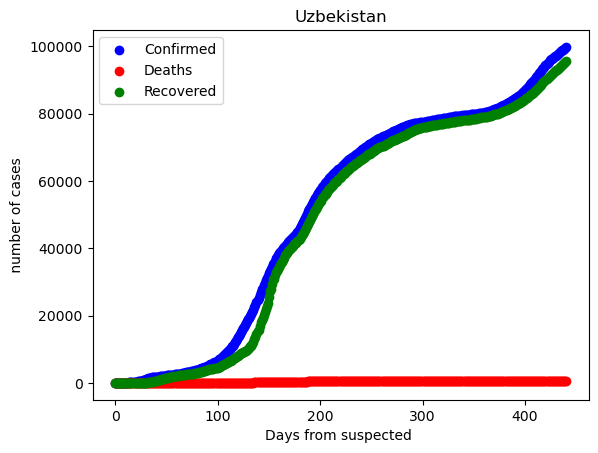

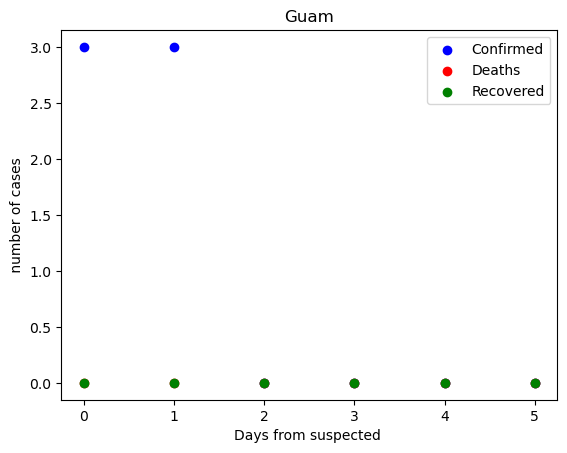

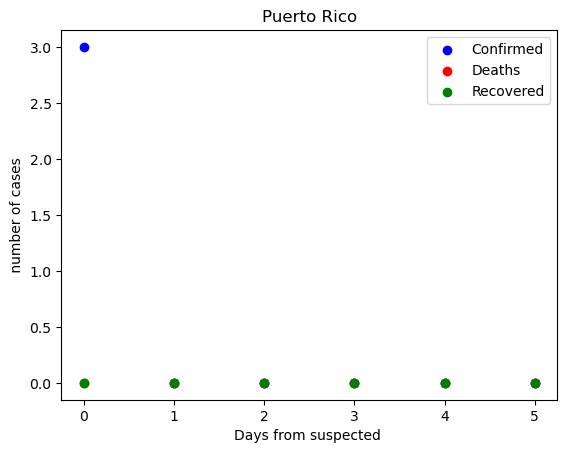

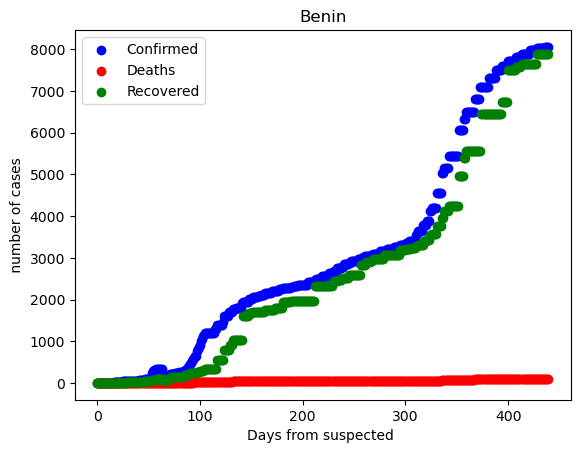

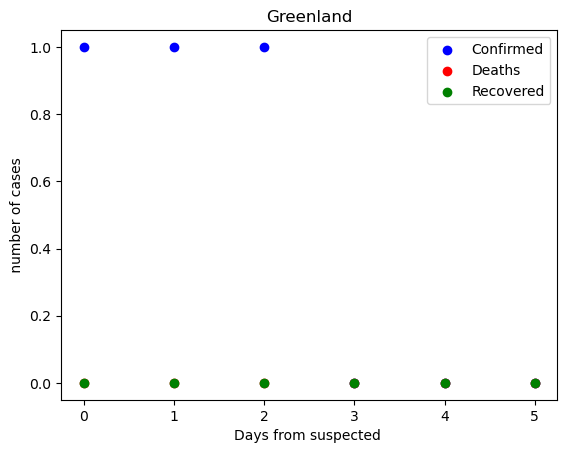

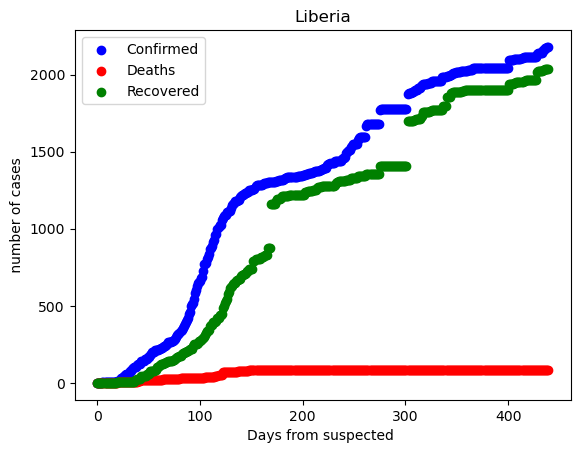

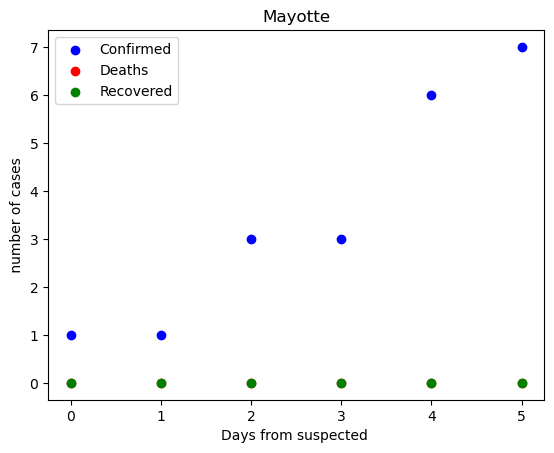

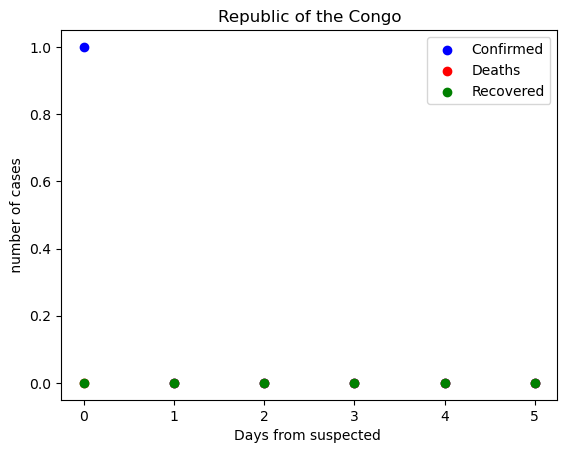

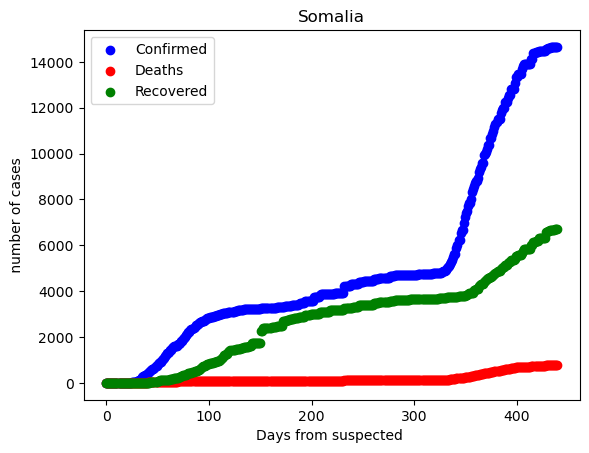

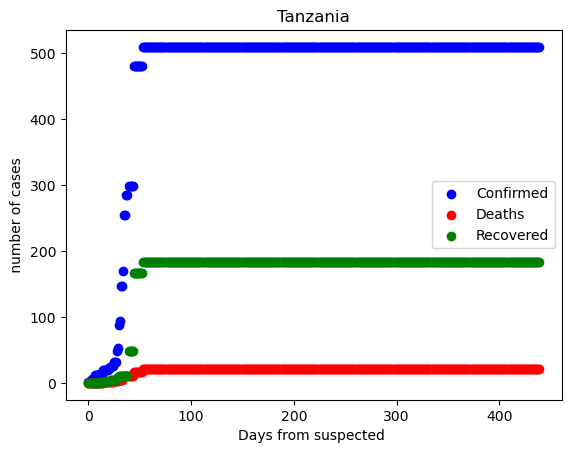

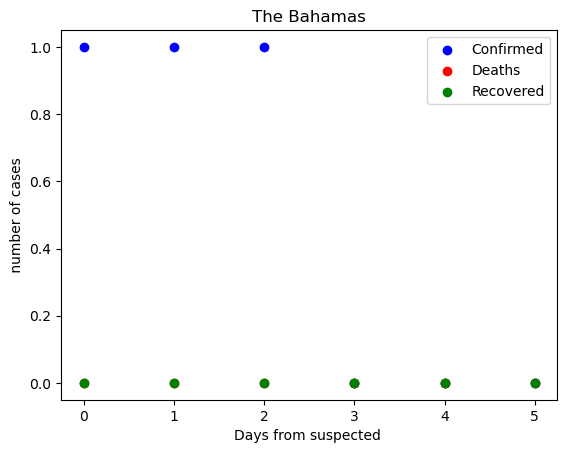

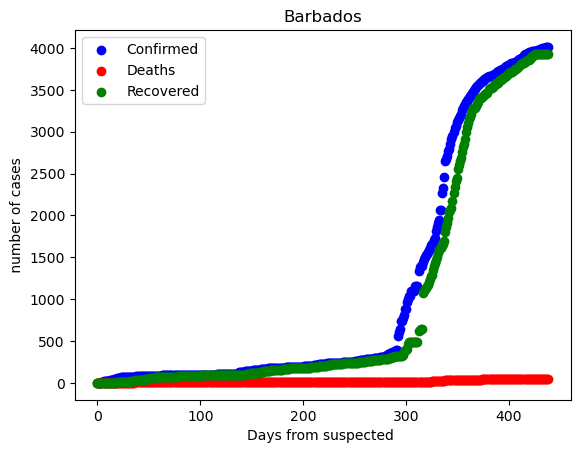

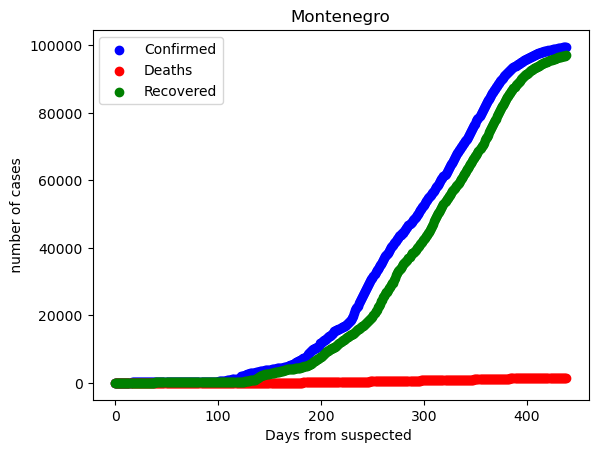

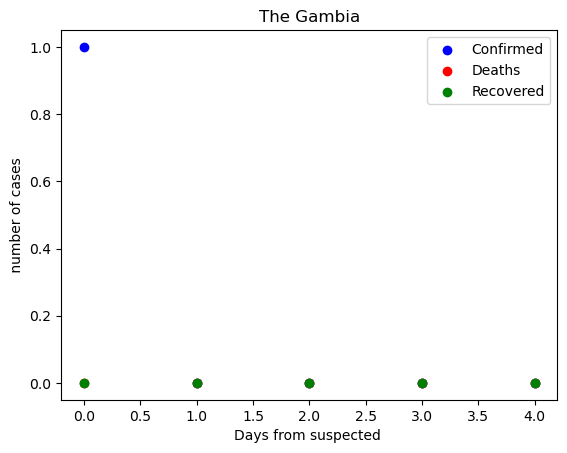

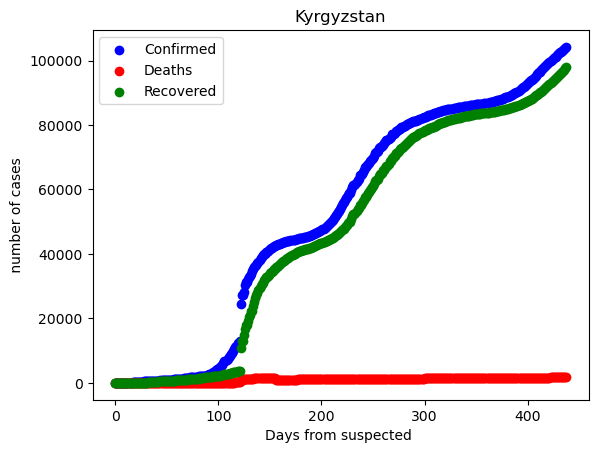

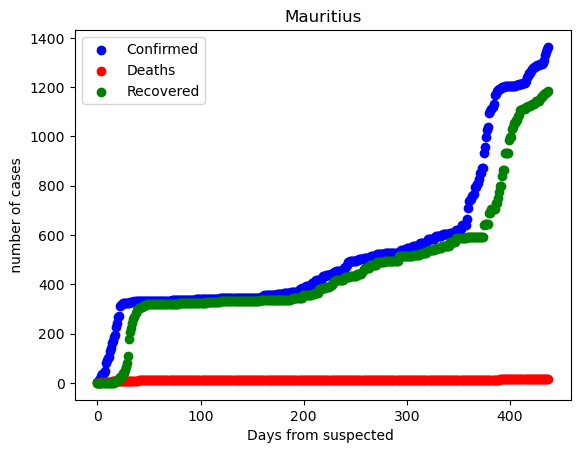

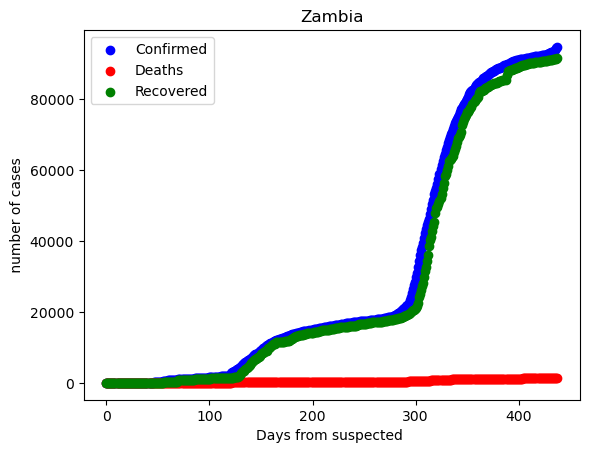

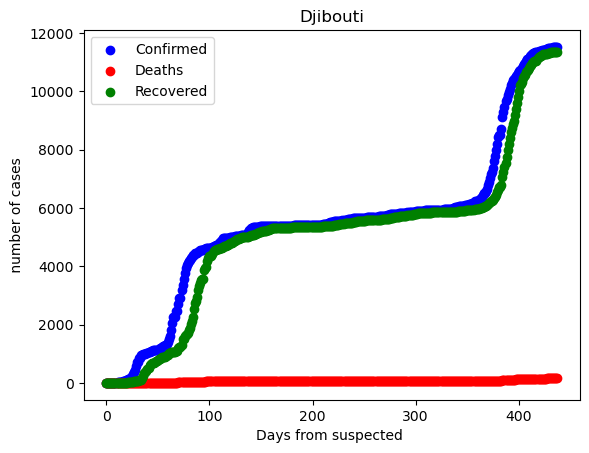

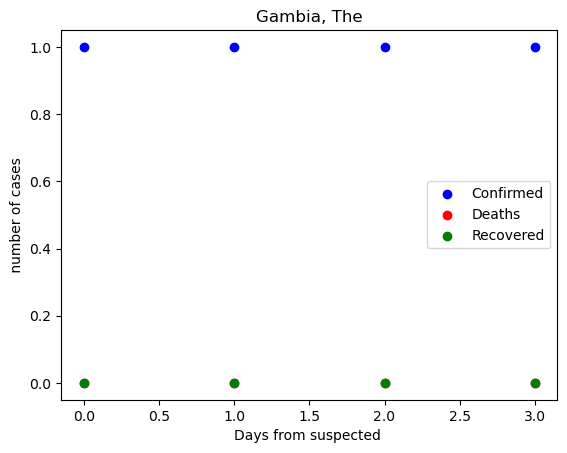

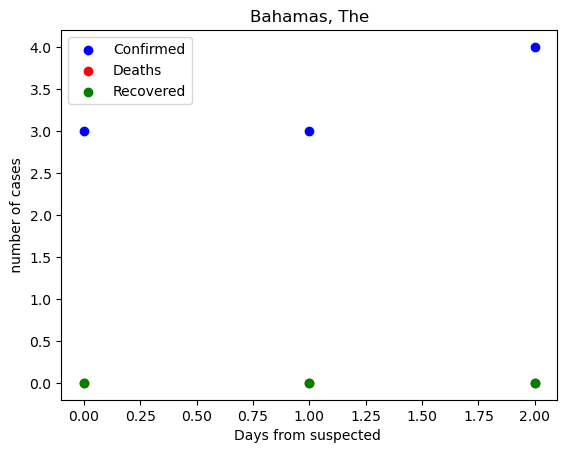

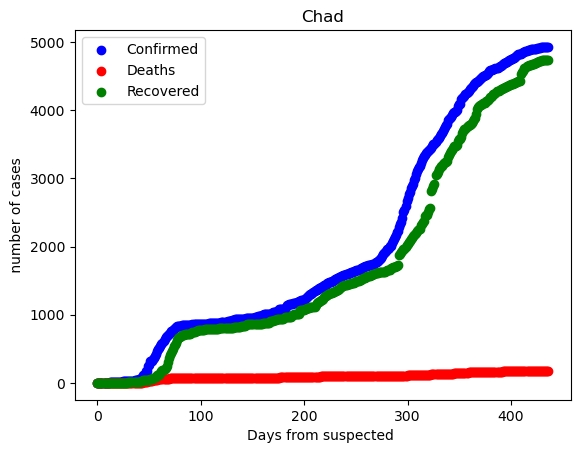

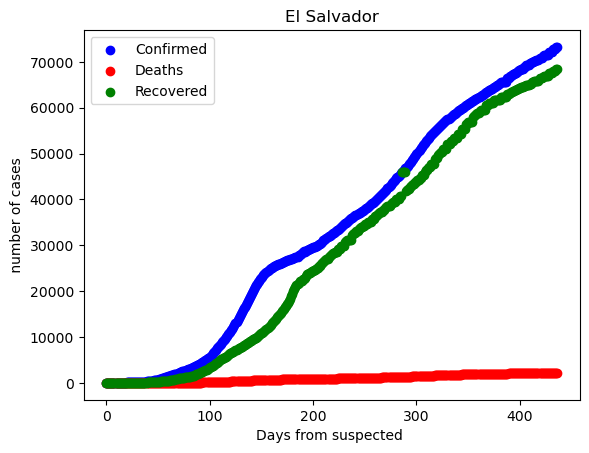

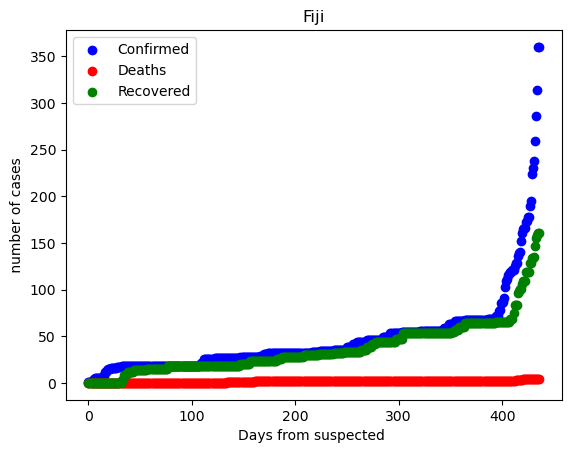

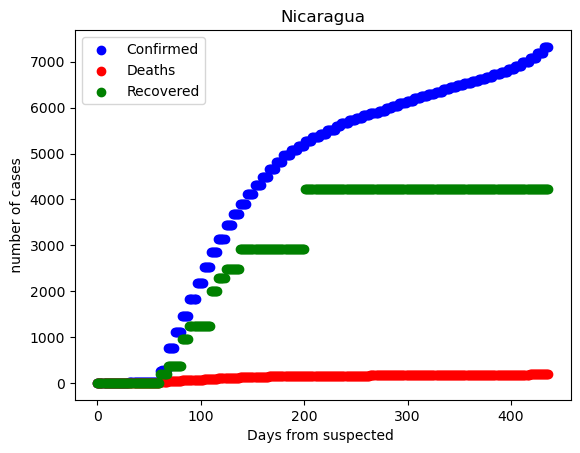

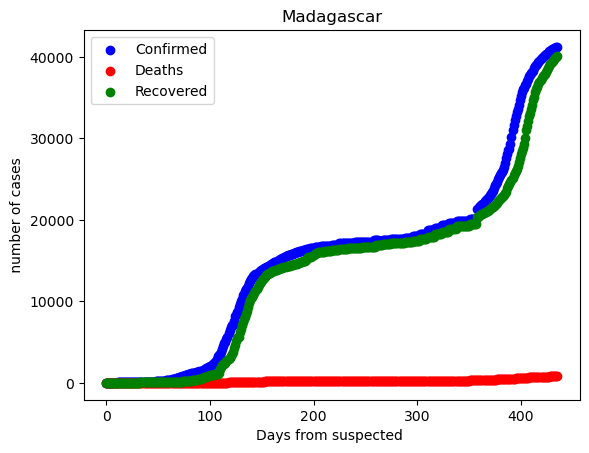

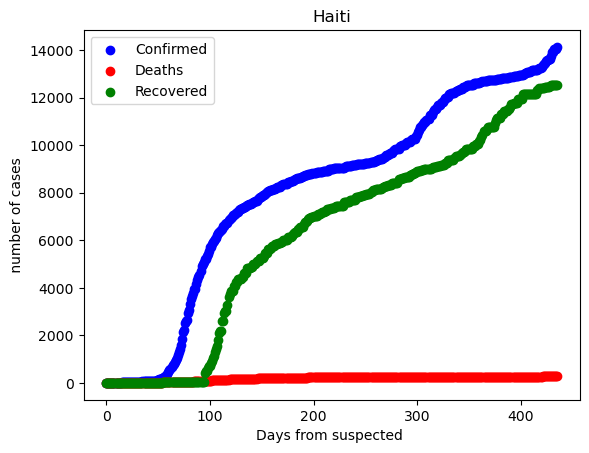

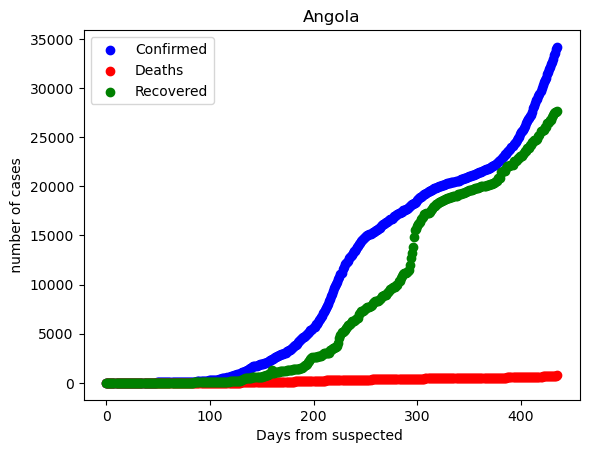

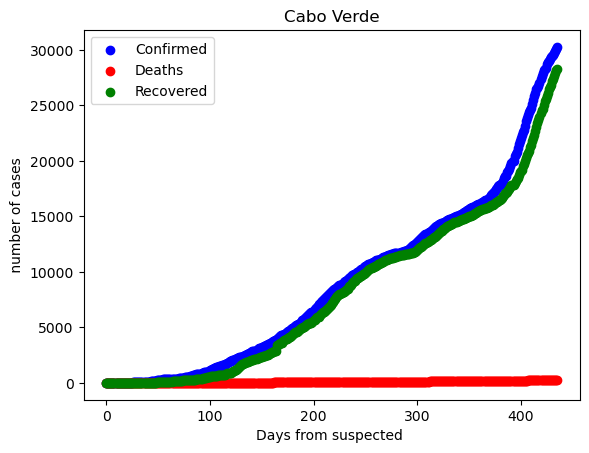

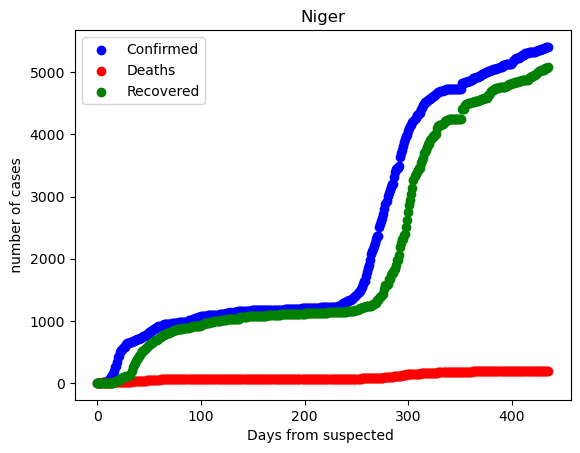

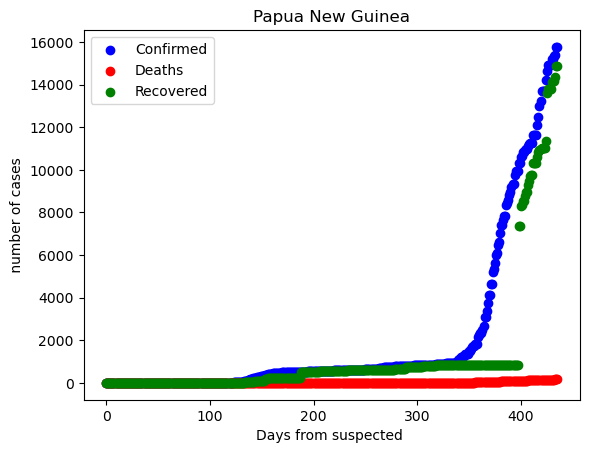

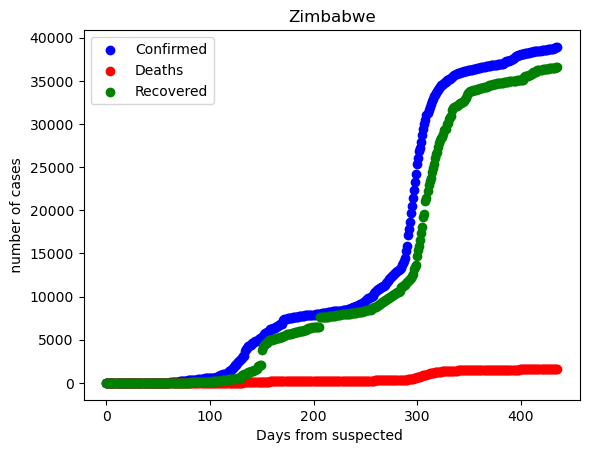

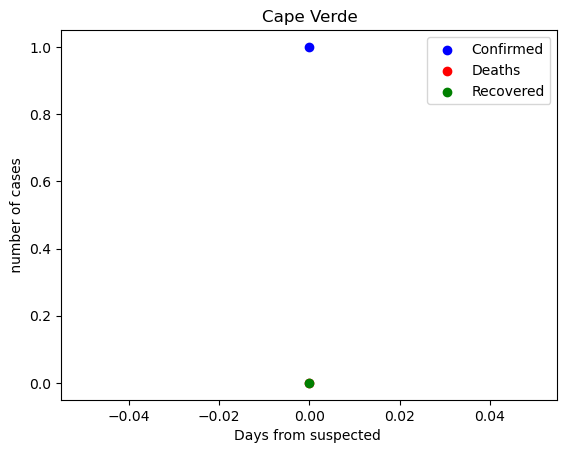

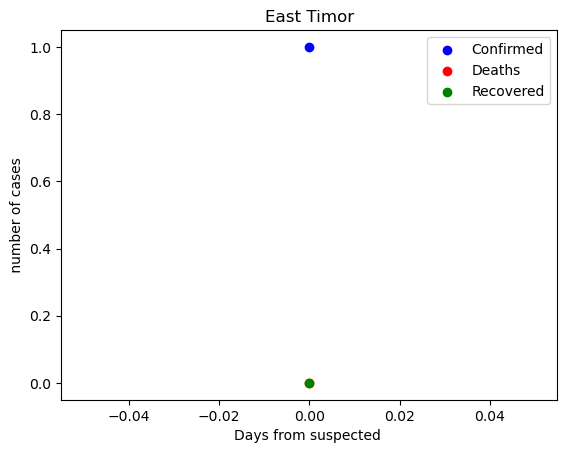

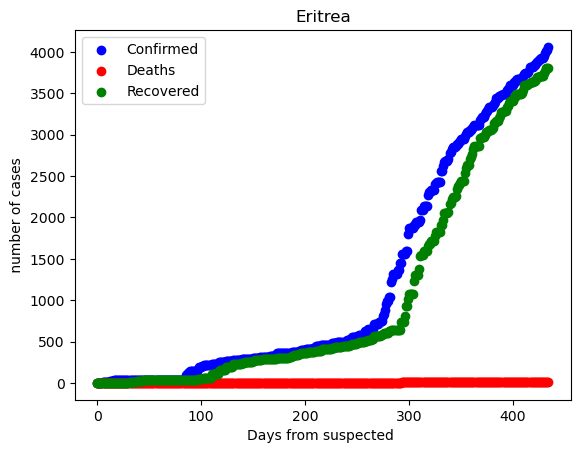

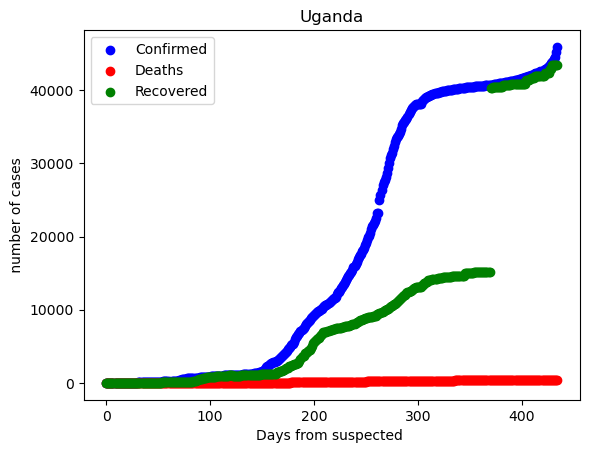

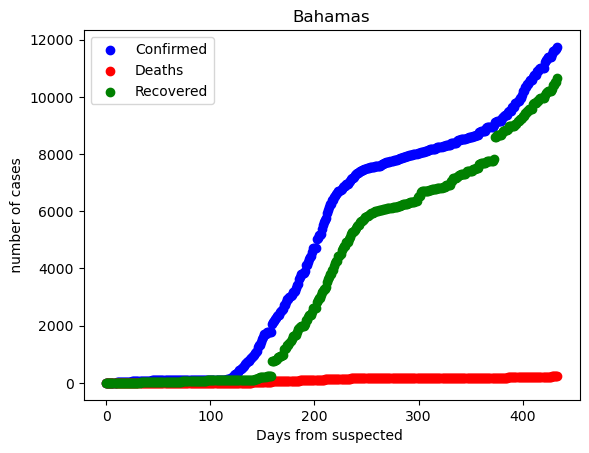

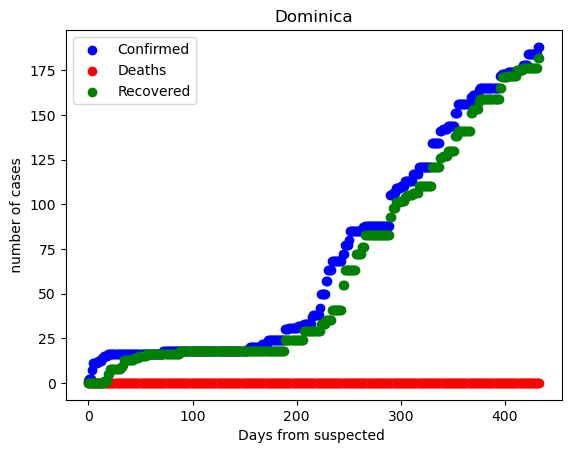

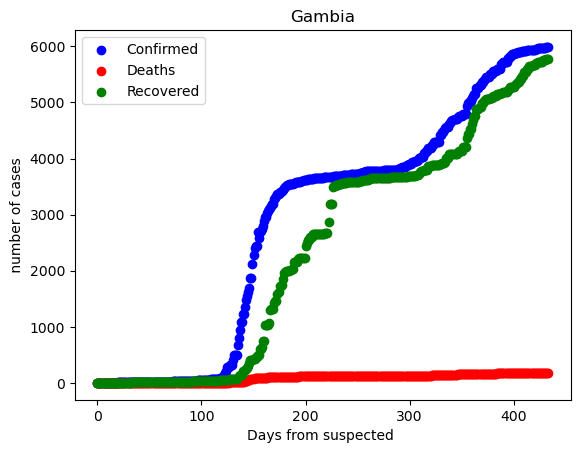

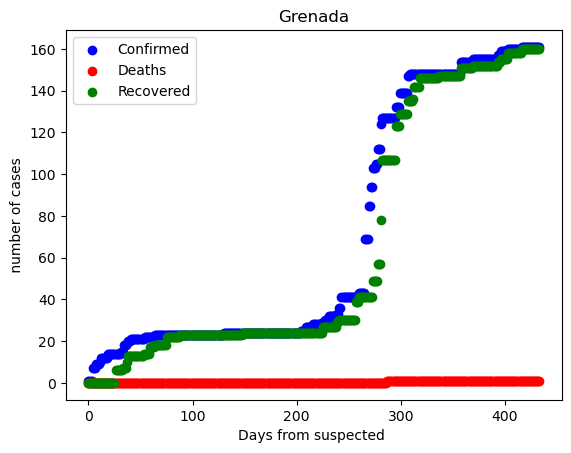

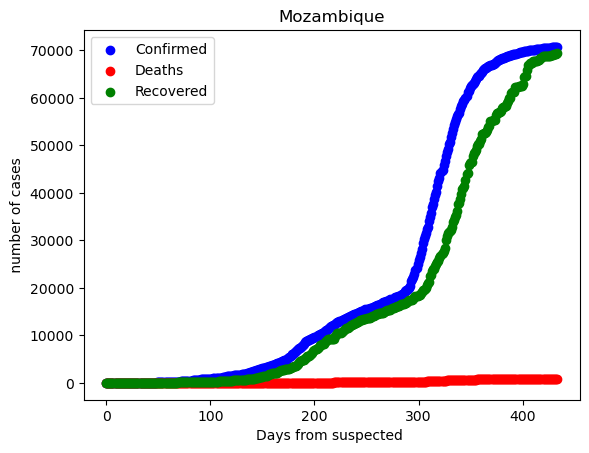

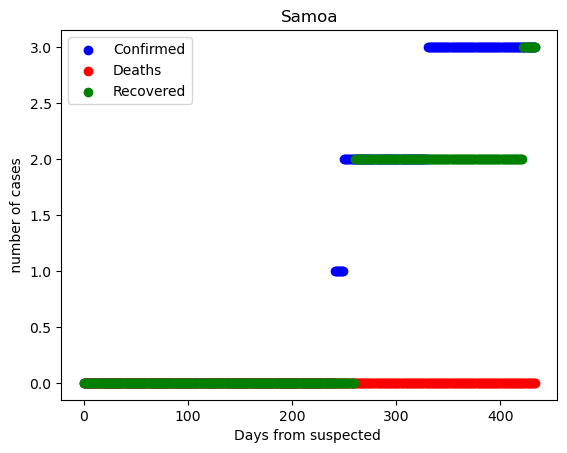

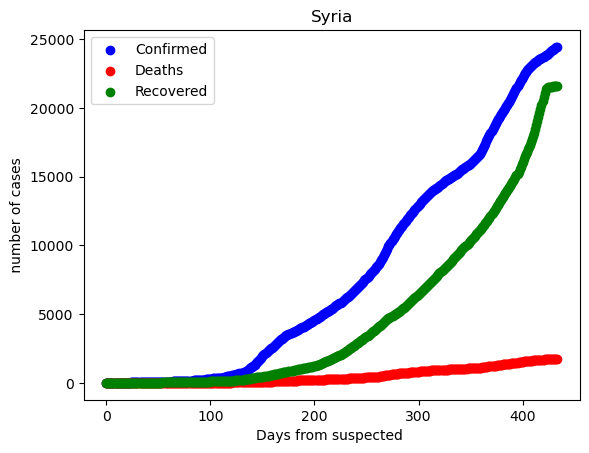

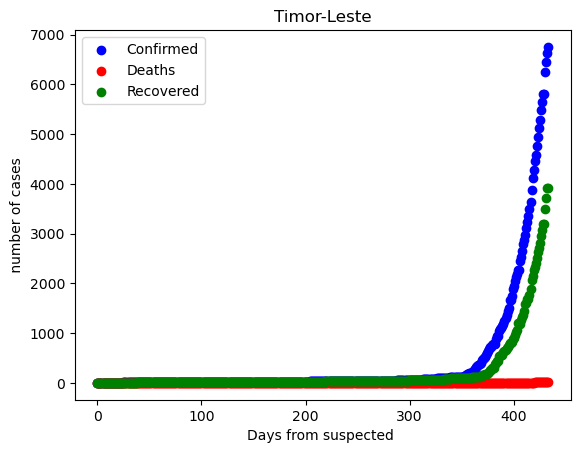

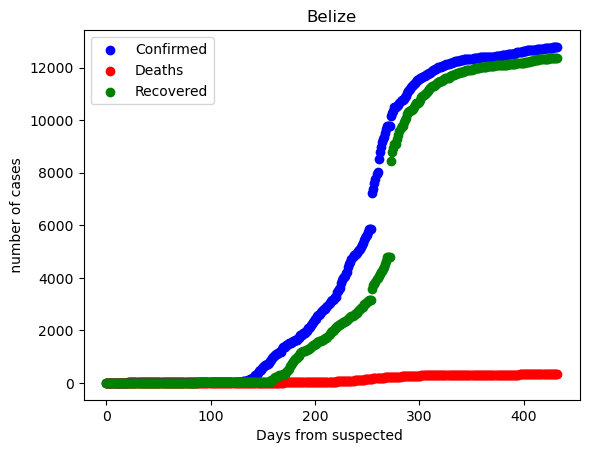

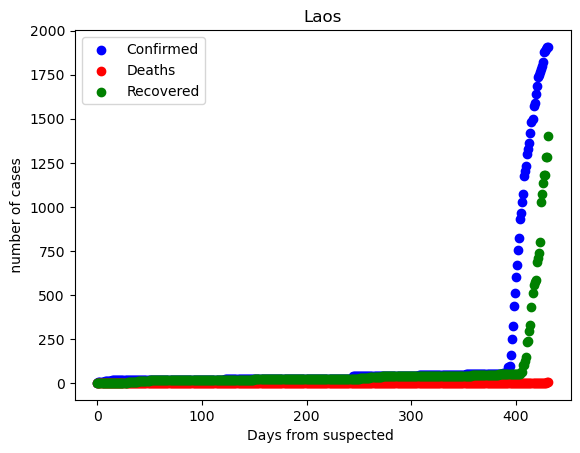

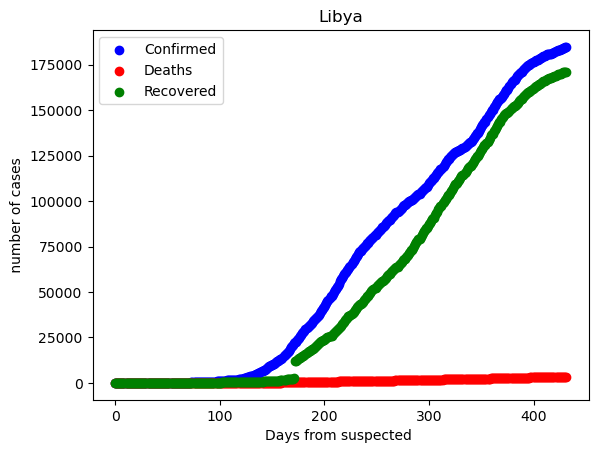

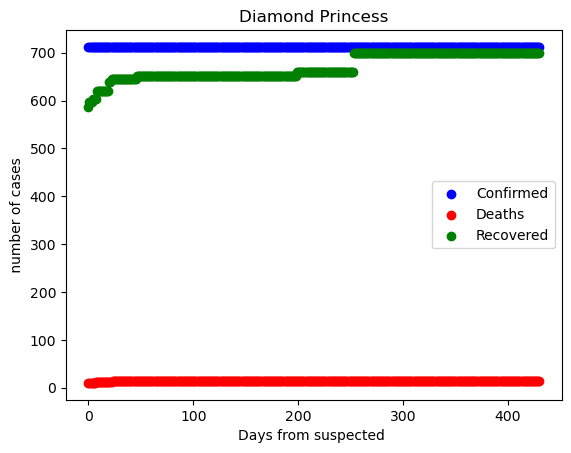

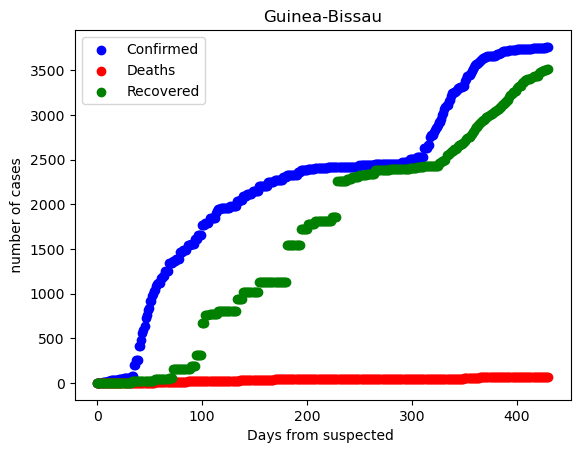

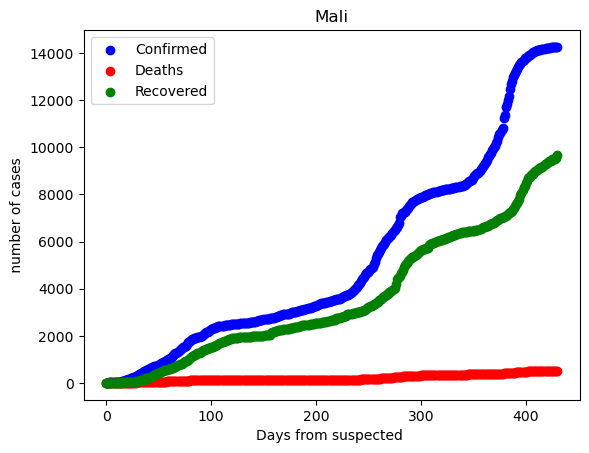

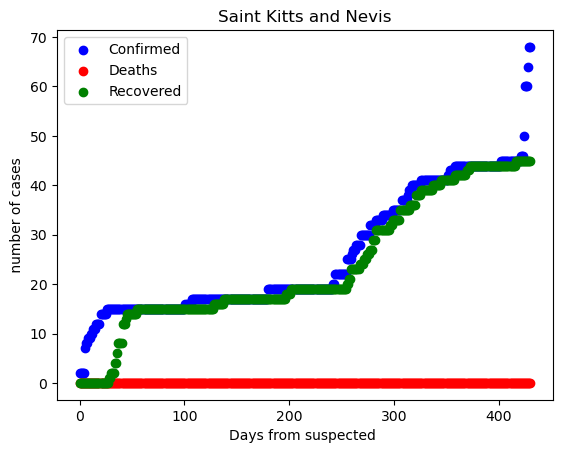

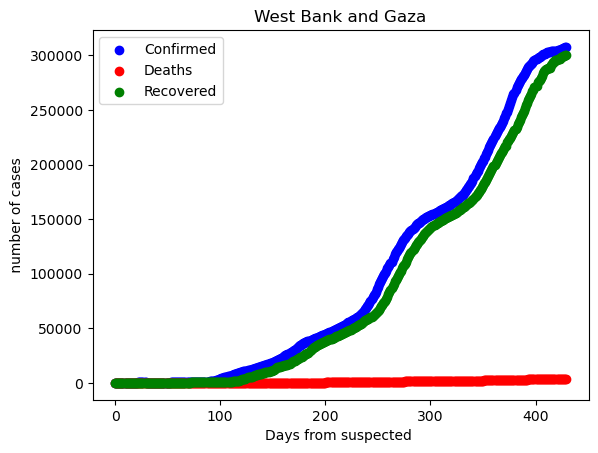

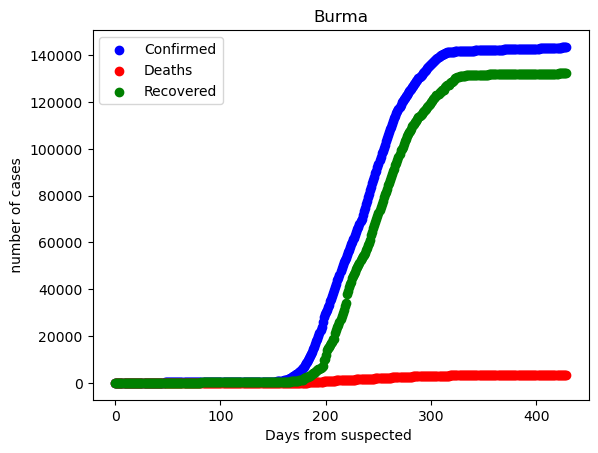

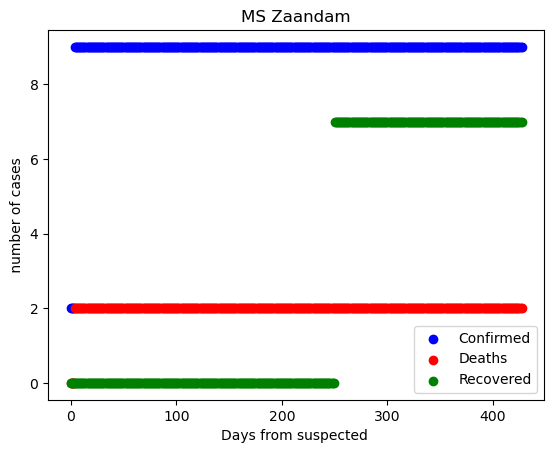

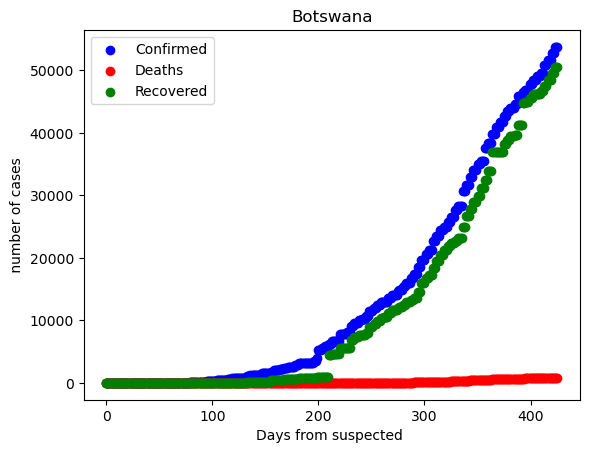

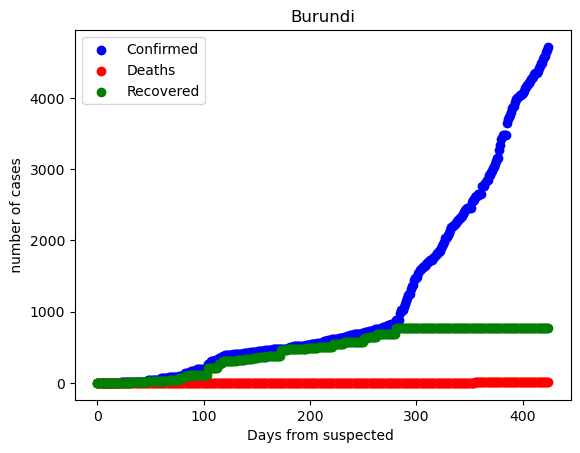

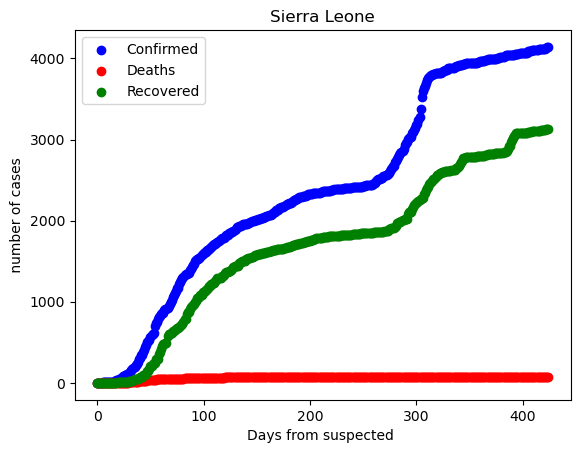

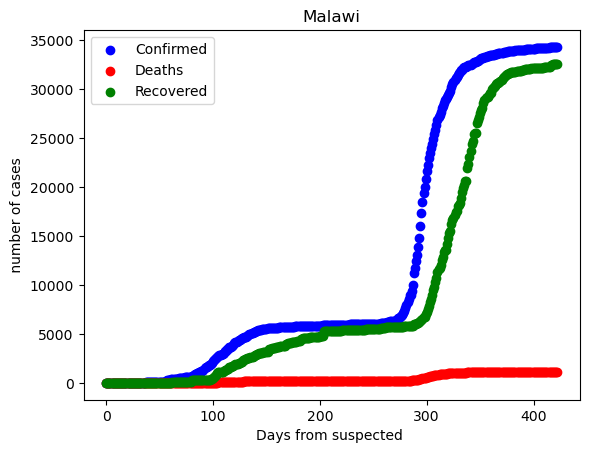

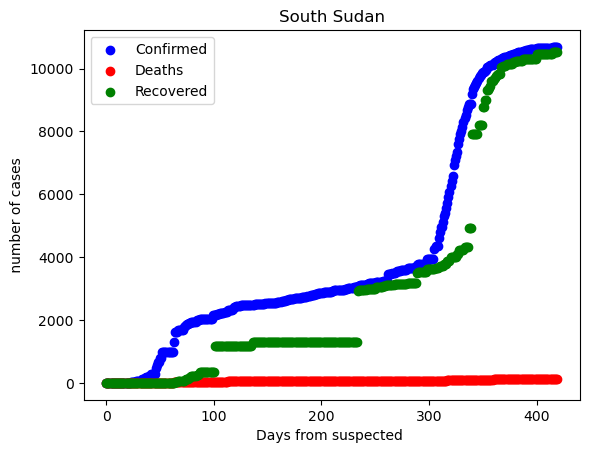

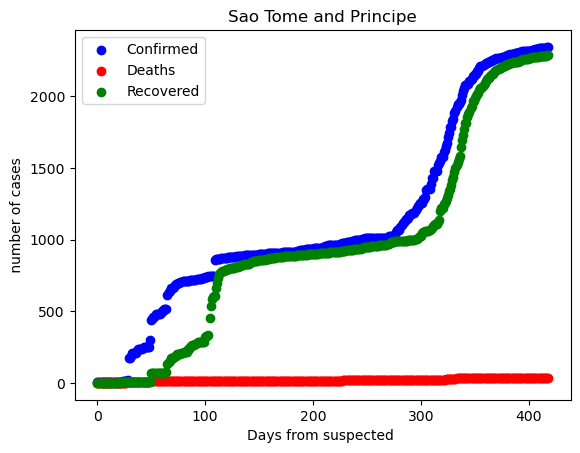

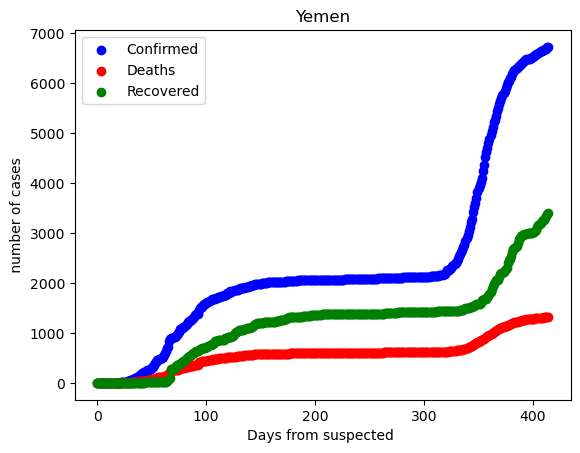

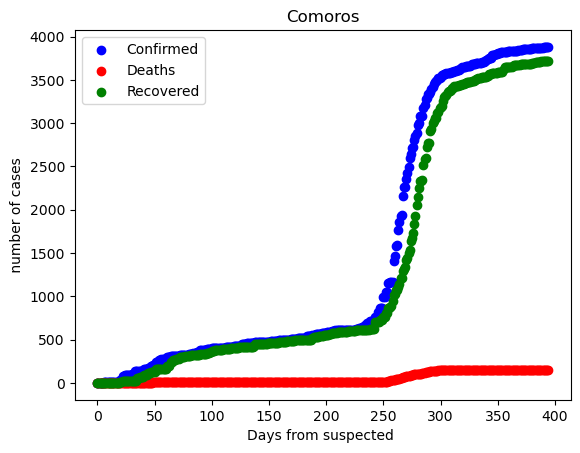

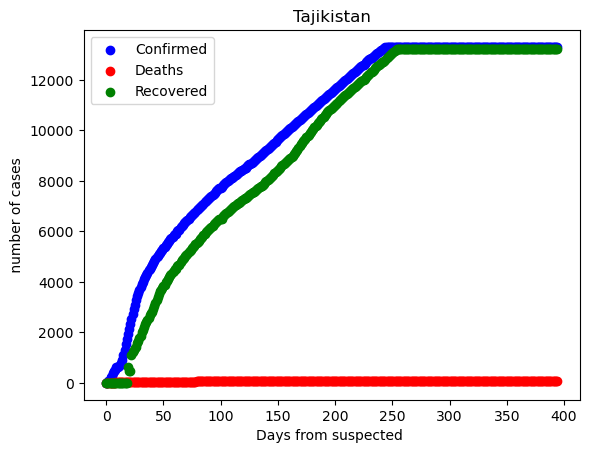

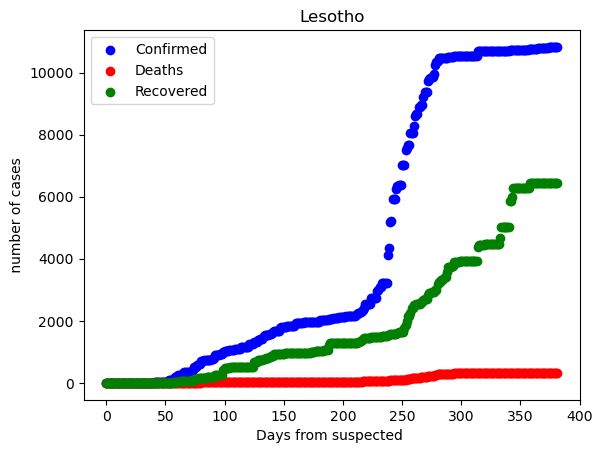

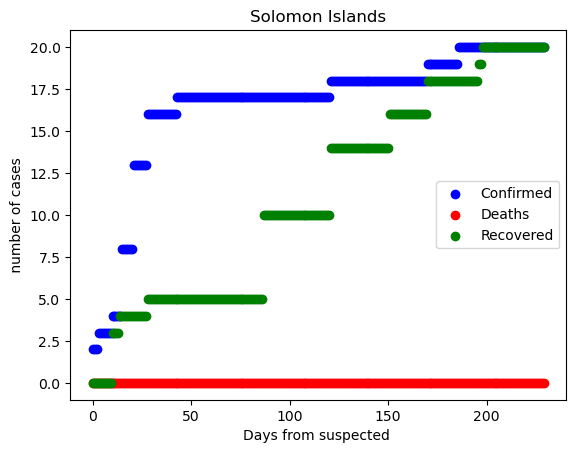

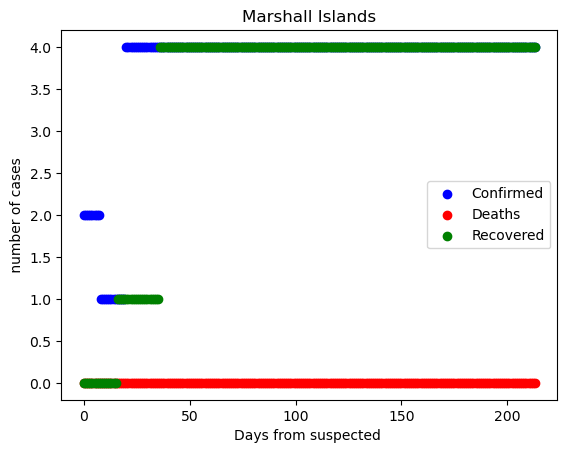

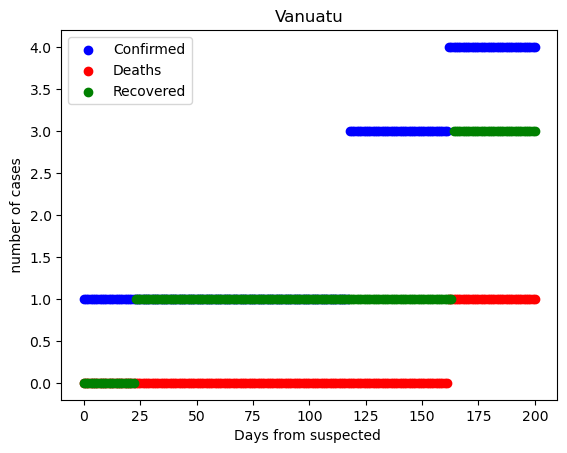

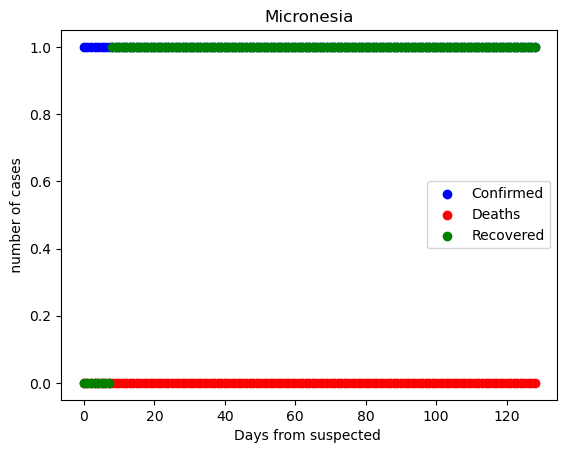

In [44]:
for index in range(0,end):
    C=df4[df4['Country']==countries[index]].reset_index()
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='b',label="Confirmed")
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='r',label="Deaths")
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='g',label="Recovered")
    plt.title(countries[index])
    plt.xlabel("Days from suspected ")
    plt.ylabel(" number of cases ")
    plt.legend()
    plt.show()

In [45]:
df6=df4.groupby(['Date'])[['Confirmed',"Deaths",'Recovered']].sum().reset_index()
df6.head()

Date Confirmed Deaths Recovered
0 2020-01-22     557.0   17.0      30.0
1 2020-01-23    1097.0   34.0      60.0
2 2020-01-24     941.0   26.0      39.0
3 2020-01-25    1437.0   42.0      42.0
4 2020-01-26    2118.0   56.0      56.0

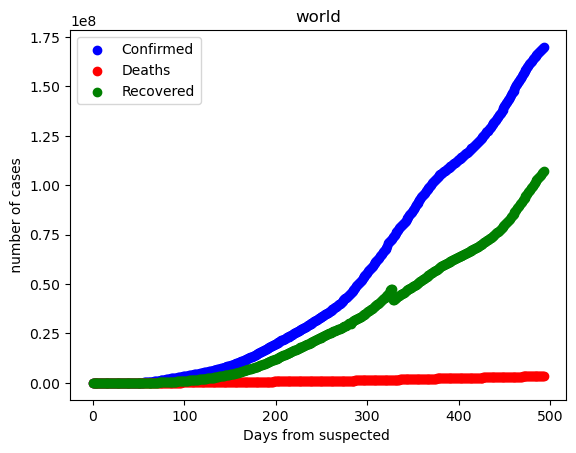

In [47]:
#world corona status

C=df6
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='b',label="Confirmed")
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='r',label="Deaths")
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='g',label="Recovered")
plt.title("world")
plt.xlabel("Days from suspected ")
plt.ylabel(" number of cases ")
plt.legend()
plt.show()